#### Loading the dataset

##### We have created a dataset by combining the dataset from 6 different categories. The reason behind using 6 catogories is that, the proportion of negative reviews is very less compared to positive reviews in every catogory, so this gives unbalanced dataset leading to models which are biased towards the positive reviews . So we have ensured that, we get atleast 100000 negative reviews and 100000 positive review ( we have suffled the data and sampled 100000 positive reviews of all the available positive reviews).

In [ ]:
import numpy as np
import tensorflow as tf
import time
import pandas as pd
import json
import warnings

warnings.filterwarnings('ignore')
print(time.strftime("%H:%M:%S", time.gmtime()))


# Import amazon reviews dataset

filepath3 = '/content/drive/MyDrive/Dataset/Sports_and_Outdoors_5.json'
filepath1 = '/content/drive/MyDrive/Dataset/Tools_and_Home_Improvement_5.json'
filepath2 = '/content/drive/MyDrive/Dataset/Home_and_Kitchen_5.json'
filepath4 = '/content/drive/MyDrive/Dataset/Patio_Lawn_and_Garden_5.json'
filepath5 = '/content/drive/MyDrive/Dataset/Office_Products_5.json'
filepath6 = '/content/drive/MyDrive/Dataset/Pet_Supplies_5.json'
data = []

with open(filepath1
            , 'r') as f:
        for line in f:
            data.append(json.loads(line))
with open(filepath2
             , 'r') as f:
         for line in f:
             data.append(json.loads(line))
with open(filepath3
             , 'r') as f:
         for line in f:
             data.append(json.loads(line))
with open(filepath4
             , 'r') as f:
         for line in f:
             data.append(json.loads(line))
with open(filepath5
             , 'r') as f:
         for line in f:
             data.append(json.loads(line))
with open(filepath6
             , 'r') as f:
         for line in f:
             data.append(json.loads(line))
df = pd.DataFrame(data)

df["length_review"] = df["reviewText"].apply(lambda x: len(x.split()))
df["length_summary"] = df["summary"].apply(lambda x: len(x.split()))
df['reviewText'] = df['reviewText'].str.lower()
df['summary'] = df['summary'].str.lower()

print("*************************************************")
print(df["reviewText"][0])
print("*************************************************")
df.head()

print(df.shape)

df2  = df.sample(frac=1).reset_index(drop=True)

df3 = df2[df2['overall'].astype(int) != 3]
df3['rating'] = df3["overall"].apply(lambda x: 1 if x > 3 else 0)

01:36:21
*************************************************
i hate it when my shirt collars, not otherwise secured in place by buttons, end up in weird places throughout the day. i purchased some steel collar stays to use with these magnets but they were only vaguely magnetic. i ended up using 2 of these magnets - one in the collar with the stay and the other inside my shirt, to lock my collar in place. they work flawlessly. they are the perfect size, and there are plenty of magnets in case you forget to remove them at the end of the day.
*************************************************
(1206861, 11)


In [ ]:
del df
del df2

In [ ]:
result_n = df3[df3['rating'] == 0]
result_p = df3[df3['rating'] == 1]

neg_reviews = result_n.sample(100183)
pos_reviews = result_p.sample(frac=0.1).reset_index(drop=True)

temp = pd.concat([neg_reviews, pos_reviews], ignore_index=True)

#shuffle the dataset
reviews_dataset = temp.sample(frac=1).reset_index(drop=True)

print(reviews_dataset.shape)
display(reviews_dataset.head(5))
del df3

(200366, 12)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,length_summary,rating
0,A2U2IBF78PV9ZI,B005VCJNYG,"John R. ""DESERT RAT""","[0, 0]",these are the lights we use on out bikes. the...,4.0,head light,1386892800,"12 13, 2013",20,2,1
1,AWKZAUC0D8DYL,B00006B8GI,"Auskan ""Auskan""","[1, 1]",if you like professional and uniform looking l...,4.0,great office product - not so good for persona...,1285200000,"09 23, 2010",547,10,1
2,A02904661A62AP64S46MT,B000GZ4Z0A,rockster,"[3, 3]",the inside liner partitioner is already torn a...,1.0,messenger bag,1361404800,"02 21, 2013",26,2,0
3,A2X0UHAJH9F4SH,B00078ZJPG,emklarer,"[0, 0]",i must have been focusing on the price and not...,1.0,cheap!,1332201600,"03 20, 2012",89,1,0
4,A3J4TETT4T379D,B004P2LEE0,"Julie A. Carleton ""Jules""","[2, 3]",i can't seem to cook chicken in this crock pot...,2.0,too hot for chicken,1396828800,"04 7, 2014",23,4,0


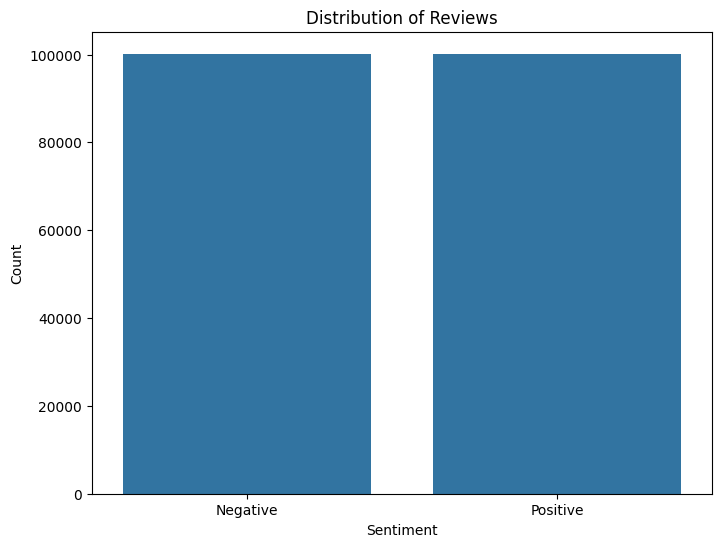

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe 'df' with a column 'Sentiment' containing binary values (1 for positive, 0 for negative)
# You can modify this according to your actual dataframe structure

# Count the number of positive and negative sentiment reviews
sentiment_counts = reviews_dataset['rating'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

#### Data preprocessing

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text_column(text):
    # text = contractions.fix(text)

    punctuation_regex = "[" + re.escape(string.punctuation) + "]"
    text = re.sub(punctuation_regex, ' ', text)
    text = re.sub(r'\s+', ' ', text)

    text = re.sub(r'\d+', '', text)

    # spell = Speller(fast=True)
    # text = ' '.join(spell(word) for word in text.split())

    date_formats = [
        r'\b(\d{1,2})[-/](\d{1,2})[-/](\d{2,4})\b',
        r'\b(\d{2,4})[-/](\d{1,2})[-/](\d{1,2})\b',
    ]
    for date_format in date_formats:
        text = re.sub(date_format, lambda x: datetime(*map(int, x.groups())).strftime('%Y-%m-%d'), text)

    # Standardize currency formats
    text = re.sub(r'\$\s?(\d+(?:,\d{3})*(?:\.\d{1,2})?)', lambda x: '${:,.2f}'.format(float(x.group(1).replace(',', ''))), text)

    # Standardize huge numbers
    text = re.sub(r'(\d{1,3})(?=(\d{3})+(?!\d))', r'\1,', text)

    # Standardize decimals
    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

reviews_dataset["reviewText2"] = reviews_dataset["reviewText"].apply(lambda x: preprocess_text_column(x))
reviews_dataset.to_csv('reviews_dataset.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### Create word2vec and fasttext models using the reviews from our custom dataset

In [ ]:

from gensim.models import Word2Vec,FastText

print(time.strftime("%H:%M:%S", time.gmtime()))

# Create a list of list of words
sentences = [review.split() for review in reviews_dataset["reviewText2"]]

# Create the word2vec CBOW model
model_cw = Word2Vec(sentences, vector_size=100, window=3, min_count=2, workers=4)

# Create the word2vec SKIPGRAM model
model_sg = Word2Vec(sentences, vector_size=100, window=3, min_count=2, workers=4, sg=1)

# Create a FASTTEXT with SKIPGRAM model
fasttext_model = FastText(sentences=sentences, vector_size=100, window=3, min_count=2, sg=1)

print(time.strftime("%H:%M:%S", time.gmtime()))

print("Total number of words in the CBOW/SKIPGRAM MODEL(number of words will be same same in both the word2vec models:")
print(len(model_cw.wv.index_to_key))

print("Total number of words in FASTTEXT model : ")
print(len(fasttext_model.wv.index_to_key))

19:54:07
20:02:48
Total number of words in the CBOW/SKIPGRAM MODEL(number of words will be same same in both the word2vec models:
50953
Total number of words in FASTTEXT model : 
50953


#### Save the all the three models created in the above cell

In [ ]:
#model_cw.save("word2vec_cw.model")
#model_sg.save("word2vec_sg.model")
#fasttext_model.save('save_fasttext.model')

#### Load the saved models ( we initially constructed the model and saved it and reusing it each time)

In [ ]:
from gensim.models import Word2Vec,FastText

model_cw = Word2Vec.load("/content/drive/MyDrive/Dataset/word2vec_cw.model")
model_sg = Word2Vec.load("/content/drive/MyDrive/Dataset/word2vec_sg.model")
fasttext_model = FastText.load('/content/drive/MyDrive/Dataset/save_fasttext.model')

### AVERAGE VECTORS for CBOW, SKIPGRAM, FASTTEXT
#### Avg vectors for CBOW

In [ ]:
from gensim.models import Word2Vec,FastText
def get_avg_vec(model, text):
    vectors = []
    for word in text.split():
        try:
            vectors.append(model.wv[word])
        except KeyError:
            continue
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # return zero vector if no words found in vocabulary
# save the embeddings as columns in the dataframe

print("Generating average vectors - CBOW")
reviews_dataset_cbow = reviews_dataset.copy(deep=True)

print(time.strftime("%H:%M:%S", time.gmtime()))
for i in range(model_cw.vector_size):
    reviews_dataset_cbow["w2v_emb_" + str(i)] = reviews_dataset_cbow["reviewText2"].apply(lambda x: get_avg_vec(model_cw,x)[i])
print(time.strftime("%H:%M:%S", time.gmtime()))
print("CBOW avg - done")
display(reviews_dataset_cbow.head(3))
print("=============================================================")
reviews_dataset_cbow.to_csv('cbow_embeddings.csv', index=False)
print(reviews_dataset_cbow.shape)

Generating average vectors - CBOW
20:04:23
20:42:32
CBOW avg - done


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,...,w2v_emb_90,w2v_emb_91,w2v_emb_92,w2v_emb_93,w2v_emb_94,w2v_emb_95,w2v_emb_96,w2v_emb_97,w2v_emb_98,w2v_emb_99
0,ADO0FWUA8G58M,B002OEU3GQ,GypsyHeart,"[2, 2]",i ordered two of these dumbbells to do physica...,5.0,good for the price,1291248000,"12 2, 2010",144,...,0.130482,0.132834,0.422156,-0.407485,0.037316,0.021922,0.077403,-0.221246,0.190981,-0.043066
1,A14JHD826UNR5L,B0064OCEUU,Jr. I.,"[0, 0]",i like this target. you can actually see from ...,5.0,target,1387670400,"12 22, 2013",22,...,-0.127982,0.068358,0.416822,-0.387994,0.040384,-0.661959,-0.081739,-0.161396,0.745831,0.165953
2,A2LXC5ZHHP0WXP,B003FHBPRM,Leah Maines,"[0, 0]","i love the post it ""laptop pop-up"" dispenser. ...",5.0,an easy and clever way to use post its,1274918400,"05 27, 2010",80,...,0.487117,-0.392384,-0.178894,-0.573080,-0.233888,-0.307696,0.457482,-0.751552,0.280581,0.315826


(200366, 113)


#### Avg vectors for SKIPGRAM

In [ ]:
from gensim.models import Word2Vec,FastText
def get_avg_vec(model, text):
    vectors = []
    for word in text.split():
        try:
            vectors.append(model.wv[word])
        except KeyError:
            continue
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # return zero vector if no words found in vocabulary
print("Generating average vectors - Skipgram")
reviews_dataset_skipgram = reviews_dataset.copy(deep=True)

print(time.strftime("%H:%M:%S", time.gmtime()))
for i in range(model_sg.vector_size):
    reviews_dataset_skipgram["w2v_emb_" + str(i)] = reviews_dataset_skipgram["reviewText2"].apply(lambda x: get_avg_vec(model_sg,x)[i])
print(time.strftime("%H:%M:%S", time.gmtime()))
print("Skipgram avg - done")
display(reviews_dataset_skipgram.head(3))
print("=============================================================")

#Saving the embeddings to csv
reviews_dataset_skipgram.to_csv('skipgram_embeddings.csv', index=False)
print(reviews_dataset_skipgram.shape)

Generating average vectors - Skipgram
21:30:52
22:18:30
Skipgram avg - done


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,...,w2v_emb_90,w2v_emb_91,w2v_emb_92,w2v_emb_93,w2v_emb_94,w2v_emb_95,w2v_emb_96,w2v_emb_97,w2v_emb_98,w2v_emb_99
0,ADO0FWUA8G58M,B002OEU3GQ,GypsyHeart,"[2, 2]",i ordered two of these dumbbells to do physica...,5.0,good for the price,1291248000,"12 2, 2010",144,...,0.257432,0.185413,-0.021253,0.005923,0.427285,0.153242,-0.075344,-0.137858,0.036203,0.035355
1,A14JHD826UNR5L,B0064OCEUU,Jr. I.,"[0, 0]",i like this target. you can actually see from ...,5.0,target,1387670400,"12 22, 2013",22,...,0.234586,0.115672,0.021580,0.105169,0.315280,0.055451,-0.098443,-0.096478,0.173452,0.137500
2,A2LXC5ZHHP0WXP,B003FHBPRM,Leah Maines,"[0, 0]","i love the post it ""laptop pop-up"" dispenser. ...",5.0,an easy and clever way to use post its,1274918400,"05 27, 2010",80,...,0.378185,0.087588,-0.221639,-0.042247,0.462756,0.152090,0.154192,-0.212644,0.161722,0.083928


(200366, 113)


#### Avg vectors for FASTTEXT

In [ ]:
from gensim.models import Word2Vec,FastText

def get_avg_vec(model, text):
    vectors = []
    for word in text.split():
        try:
            vectors.append(model.wv[word])
        except KeyError:
            continue
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # return zero vector if no words found in vocabulary
print("Generating average vectors - Fasttext")
reviews_dataset_fasttext = reviews_dataset.copy(deep=True)
print(time.strftime("%H:%M:%S", time.gmtime()))
for i in range(fasttext_model.vector_size):
    reviews_dataset_fasttext["w2v_emb_" + str(i)] = reviews_dataset_fasttext["reviewText2"].apply(lambda x: get_avg_vec(fasttext_model,x)[i])
print(time.strftime("%H:%M:%S", time.gmtime()))
print("Fasttext avg - done")
display(reviews_dataset_fasttext.head(3))
print("=============================================================")

#Saving the embeddings to csv
reviews_dataset_fasttext.to_csv('fasttext_embeddings.csv', index=False)

Generating average vectors - Fasttext


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,length_summary,rating,reviewText2
0,A2JJ0BFYELJY3L,B002HEXAXQ,Joseph J. Bosas,"[1, 1]",this thing not only works well but feels like ...,5.0,durable opener,1324684800,"12 24, 2011",44,2,1,thing works well feels like built last bought ...
1,A1PWBLQ66CBC6V,B004RGOKR2,Richard W. Rivero,"[6, 6]","i'm so happy with this machine, so simple to u...",5.0,just good!!!,1324080000,"12 17, 2011",22,2,1,happy machine simple use affordable handle wid...
2,A6ZBCY64I97R,B00027909I,Barbara Plemmons,"[7, 7]",we invested in this toaster as it was made in ...,1.0,not a good investment,1330473600,"02 29, 2012",76,4,0,invested toaster made uk felt would last longe...


23:17:51
00:06:40
Fasttext avg - done


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,...,w2v_emb_90,w2v_emb_91,w2v_emb_92,w2v_emb_93,w2v_emb_94,w2v_emb_95,w2v_emb_96,w2v_emb_97,w2v_emb_98,w2v_emb_99
0,A2JJ0BFYELJY3L,B002HEXAXQ,Joseph J. Bosas,"[1, 1]",this thing not only works well but feels like ...,5.0,durable opener,1324684800,"12 24, 2011",44,...,-0.397882,0.043422,-0.087524,0.262439,-0.109387,0.382792,-0.052290,-0.037187,-0.021293,0.294314
1,A1PWBLQ66CBC6V,B004RGOKR2,Richard W. Rivero,"[6, 6]","i'm so happy with this machine, so simple to u...",5.0,just good!!!,1324080000,"12 17, 2011",22,...,-0.354808,-0.105570,-0.209013,0.235483,-0.133359,0.308699,0.130069,-0.092993,0.007635,0.311583
2,A6ZBCY64I97R,B00027909I,Barbara Plemmons,"[7, 7]",we invested in this toaster as it was made in ...,1.0,not a good investment,1330473600,"02 29, 2012",76,...,-0.311076,0.028693,-0.141851,0.093431,-0.232956,0.260579,0.047165,-0.135924,-0.113433,0.325877


### EDA

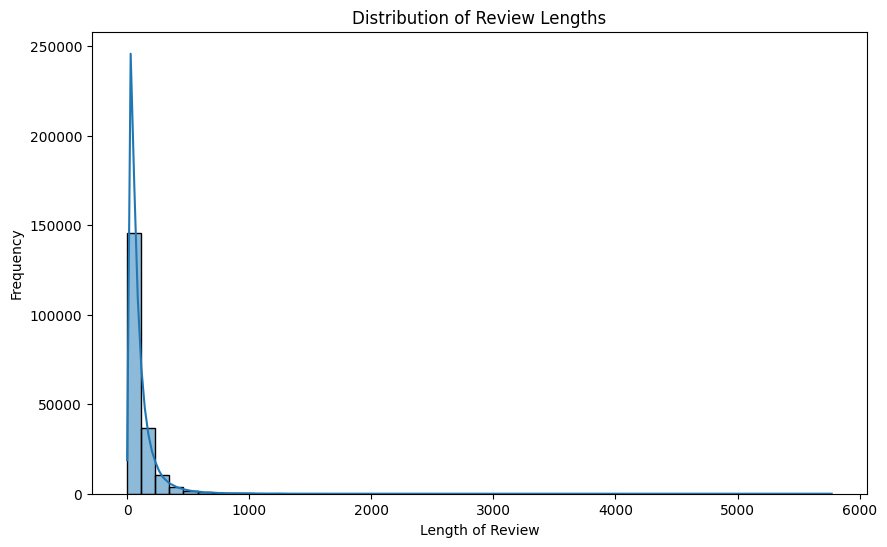

In [ ]:
# Distribution of Summary Lengths
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Review Lengths
plt.figure(figsize=(10, 6))
sns.histplot(reviews_dataset['length_review'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

Shape of tokens_array: (100, 100)


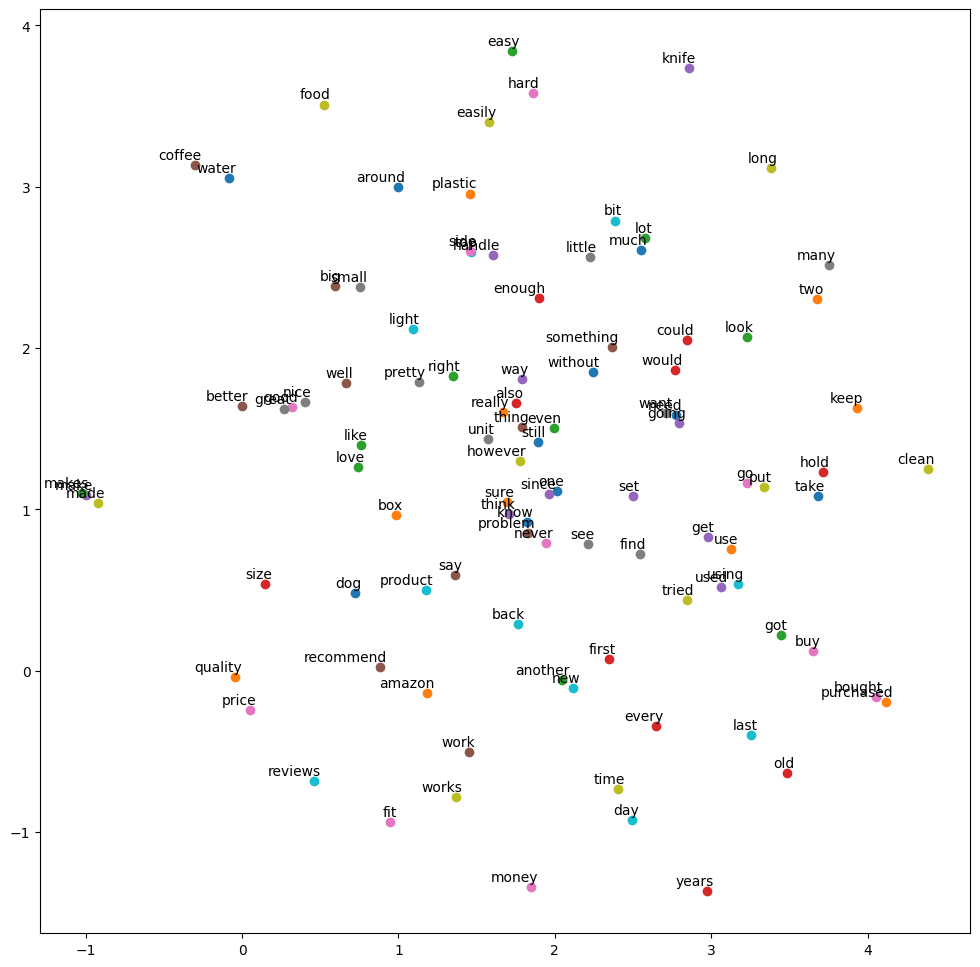

Shape of tokens_array: (100, 100)


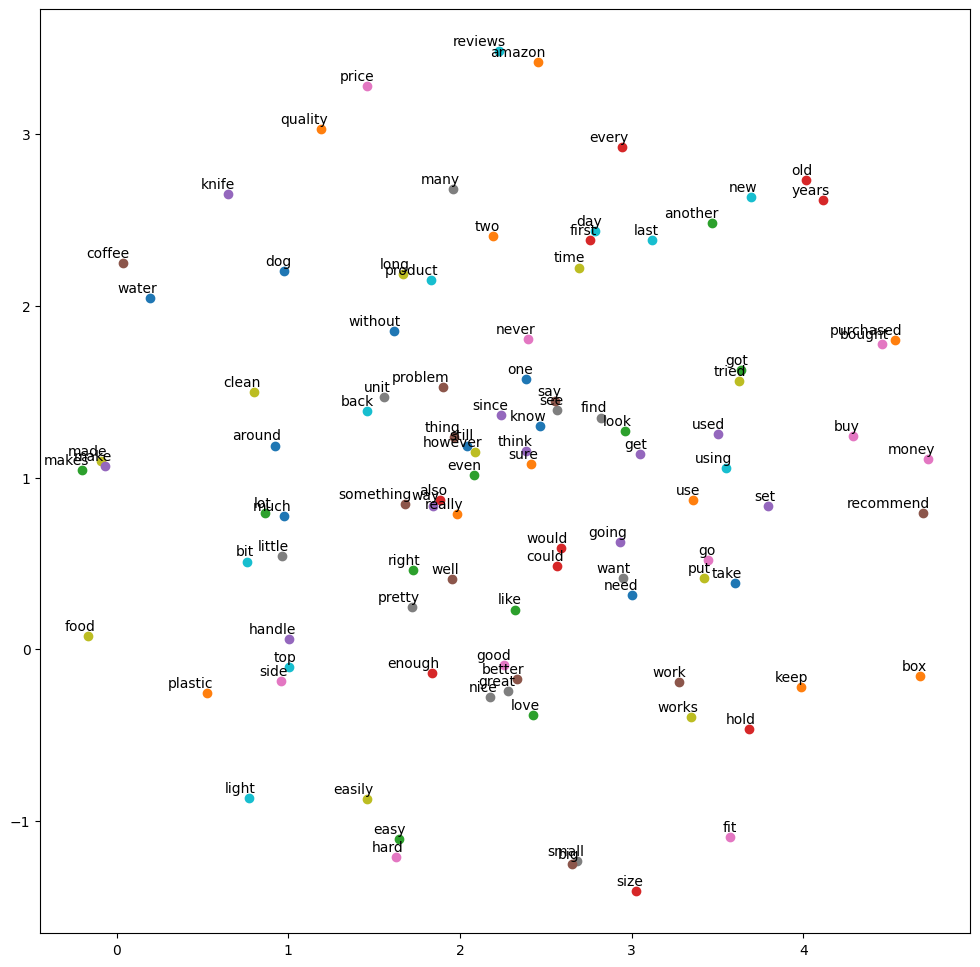

Shape of tokens_array: (100, 100)


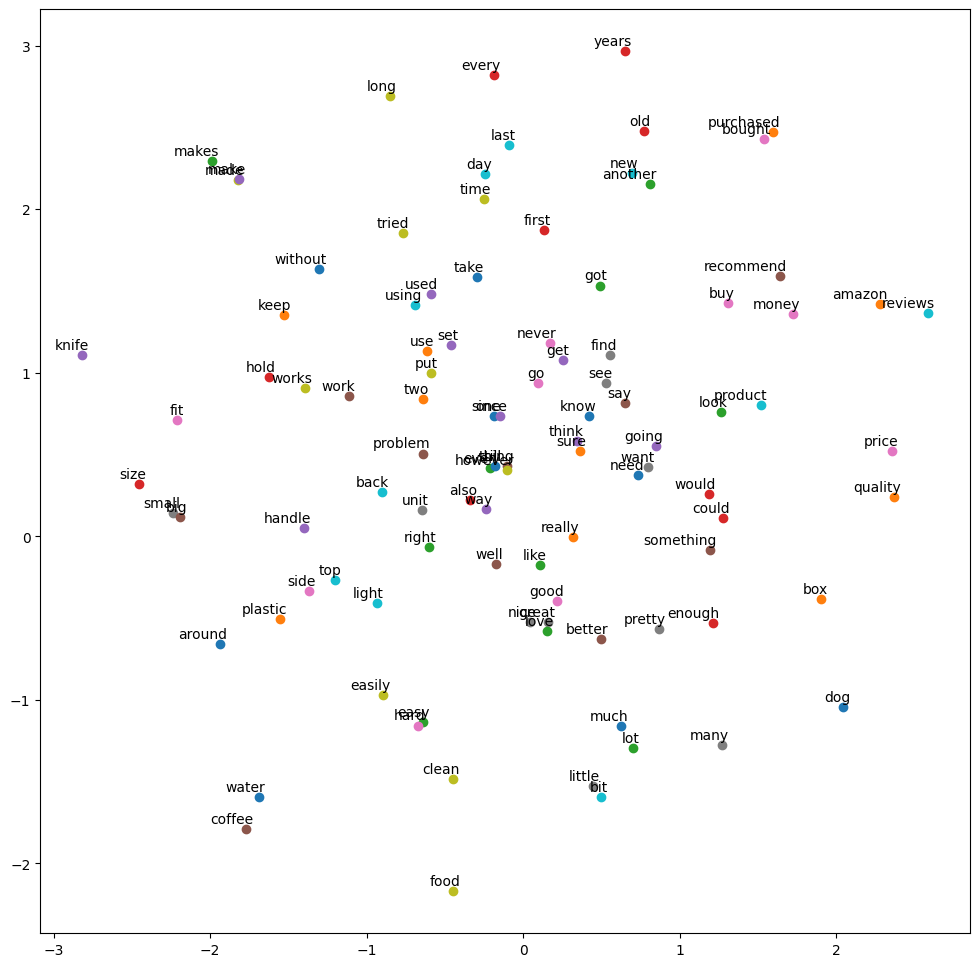

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.index_to_key[:100]:
        vector = model.wv[word]
        tokens.append(vector)
        labels.append(word)

    tokens_array = np.array(tokens)


    print(f"Shape of tokens_array: {tokens_array.shape}")

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens_array)

    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    plt.figure(figsize=(12, 12))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model_cw)
tsne_plot(model_sg)
tsne_plot(fasttext_model)

#### EDA to analyze associations between the vectors of CBOW, Skipgram, Fasttext

In [ ]:
# get the top 10 most similar words in CBOW
print(model_cw.wv.most_similar('amazing', topn=10))

[('awesome', 0.8406095504760742), ('fantastic', 0.8258745074272156), ('wonderful', 0.7509044408798218), ('incredible', 0.744979739189148), ('outstanding', 0.731920063495636), ('fabulous', 0.7130479216575623), ('great', 0.7050991654396057), ('terrific', 0.6906856298446655), ('excellent', 0.6776435971260071), ('amazed', 0.6696110963821411)]


In [ ]:
# get the top 10 most similar words in sg
print(model_sg.wv.most_similar('amazing', topn=10))

[('fantastic', 0.8809832334518433), ('awesome', 0.8541463613510132), ('great', 0.7969794273376465), ('wonderful', 0.7923558950424194), ('phenomenal', 0.780850887298584), ('incredible', 0.7675270438194275), ('outstanding', 0.7663640975952148), ('fabulous', 0.7618303298950195), ('terrific', 0.7600460648536682), ('good', 0.7420468926429749)]


In [ ]:
# get the top 10 most similar words in fasttext
print(fasttext_model.wv.most_similar('amazing', topn=10))

[('amazin', 0.8975323438644409), ('mazing', 0.8826409578323364), ('fantastic', 0.8761130571365356), ('fantastik', 0.855621337890625), ('awesome', 0.8550577163696289), ('amazingness', 0.8546926379203796), ('fantabulous', 0.8402970433235168), ('fantasy', 0.8286795020103455), ('wonderfull', 0.8194393515586853), ('wonderful', 0.8165009617805481)]


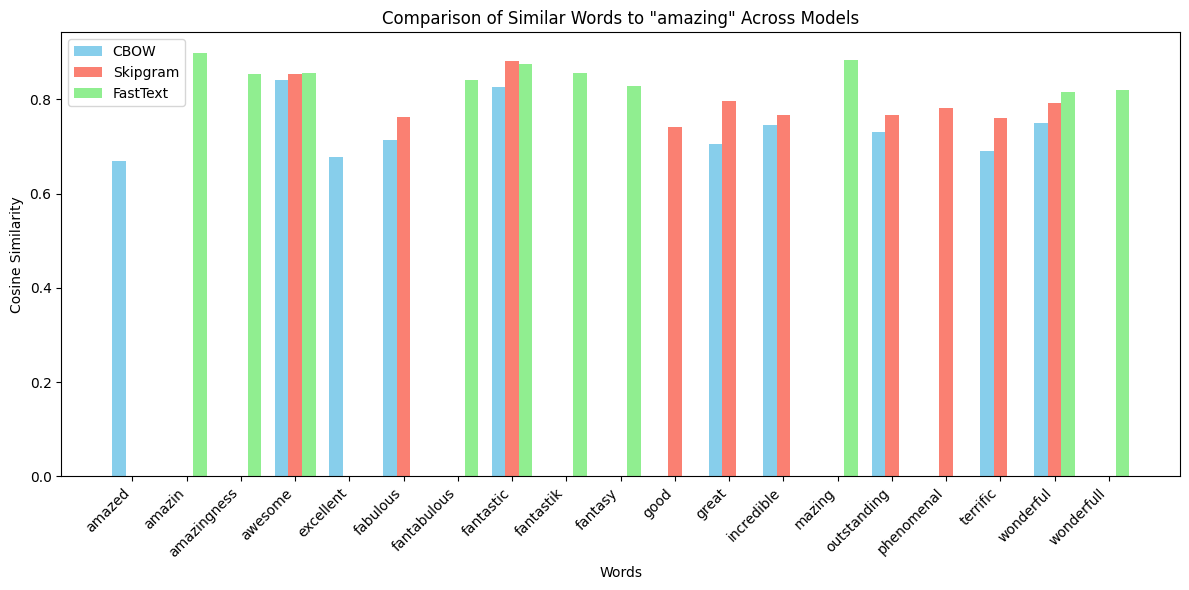

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for CBOW, Skipgram, and FastText models
cbow_data = [('awesome', 0.8406095504760742), ('fantastic', 0.8258745074272156), ('wonderful', 0.7509044408798218), ('incredible', 0.744979739189148), ('outstanding', 0.731920063495636), ('fabulous', 0.7130479216575623), ('great', 0.7050991654396057), ('terrific', 0.6906856298446655), ('excellent', 0.6776435971260071), ('amazed', 0.6696110963821411)]
skipgram_data = [('fantastic', 0.8809832334518433), ('awesome', 0.8541463613510132), ('great', 0.7969794273376465), ('wonderful', 0.7923558950424194), ('phenomenal', 0.780850887298584), ('incredible', 0.7675270438194275), ('outstanding', 0.7663640975952148), ('fabulous', 0.7618303298950195), ('terrific', 0.7600460648536682), ('good', 0.7420468926429749)]
fasttext_data = [('amazin', 0.8975323438644409), ('mazing', 0.8826409578323364), ('fantastic', 0.8761130571365356), ('fantastik', 0.855621337890625), ('awesome', 0.8550577163696289), ('amazingness', 0.8546926379203796), ('fantabulous', 0.8402970433235168), ('fantasy', 0.8286795020103455), ('wonderfull', 0.8194393515586853), ('wonderful', 0.8165009617805481)]

# Extract words and scores from each model's data
cbow_words, cbow_scores = zip(*cbow_data)
skipgram_words, skipgram_scores = zip(*skipgram_data)
fasttext_words, fasttext_scores = zip(*fasttext_data)

# Create a set of all words from all models
all_words_set = set(cbow_words) | set(skipgram_words) | set(fasttext_words)
all_words = sorted(all_words_set)

# Initialize scores for each model
cbow_scores_dict = {word: 0 for word in all_words}
skipgram_scores_dict = {word: 0 for word in all_words}
fasttext_scores_dict = {word: 0 for word in all_words}

# Update scores dictionaries with actual scores where available
cbow_scores_dict.update(dict(cbow_data))
skipgram_scores_dict.update(dict(skipgram_data))
fasttext_scores_dict.update(dict(fasttext_data))

# Plotting the comparison graph
plt.figure(figsize=(12, 6))

# Set positions for the bars
bar_width = 0.25
index = np.arange(len(all_words))

# CBOW model
plt.bar(index - bar_width, [cbow_scores_dict[word] for word in all_words], color='skyblue', label='CBOW', width=bar_width)

# Skipgram model
plt.bar(index, [skipgram_scores_dict[word] for word in all_words], color='salmon', label='Skipgram', width=bar_width)

# FastText model
plt.bar(index + bar_width, [fasttext_scores_dict[word] for word in all_words], color='lightgreen', label='FastText', width=bar_width)

plt.xlabel('Words')
plt.ylabel('Cosine Similarity')
plt.title('Comparison of Similar Words to "amazing" Across Models')
plt.xticks(index, all_words, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Compare all of the above models using the word "amazing"
# Get the word embeddings for "diabetes" from all models
from sklearn.metrics.pairwise import cosine_similarity

embedding_fasttext = fasttext_model.wv["amazing"].reshape(1, -1)
embedding_sg = model_sg.wv["amazing"].reshape(1, -1)
embedding_cw = model_cw.wv["amazing"].reshape(1, -1)


# # Calculate the cosine similarity between the embeddings
cosine_distance_sg_cw = 1 - cosine_similarity(embedding_sg, embedding_cw)[0][0]
cosine_distance_fasttext_sg = 1 - cosine_similarity(embedding_fasttext, embedding_sg)[0][0]
cosine_distance_fasttext_cw = 1 - cosine_similarity(embedding_fasttext, embedding_cw)[0][0]


print("Cosine distance between Skip-gram and CBOW embeddings for 'amazing':", cosine_distance_sg_cw)
print("Cosine distance between FastText and Skip-gram embeddings for 'amazing':", cosine_distance_fasttext_sg)
print("Cosine distance between FastText and CBOW embeddings for 'amazing':", cosine_distance_fasttext_cw)

Cosine distance between Skip-gram and CBOW embeddings for 'amazing': 0.535292774438858
Cosine distance between FastText and Skip-gram embeddings for 'amazing': 0.901054285466671
Cosine distance between FastText and CBOW embeddings for 'amazing': 0.8553476184606552


In [ ]:

# Normalize the embeddings
embedding_fasttext_nm = embedding_fasttext / np.linalg.norm(embedding_fasttext)
embedding_sg_nm = embedding_sg / np.linalg.norm(embedding_sg)
embedding_cw_nm = embedding_cw / np.linalg.norm(embedding_cw)


# # Calculate the cosine similarity between the embeddings
cosine_distance_sg_cw = 1 - cosine_similarity(embedding_sg_nm, embedding_cw_nm)[0][0]
cosine_distance_fasttext_sg = 1 - cosine_similarity(embedding_fasttext_nm, embedding_sg_nm)[0][0]
cosine_distance_fasttext_cw = 1 - cosine_similarity(embedding_fasttext_nm, embedding_cw_nm)[0][0]

print("Cosine distance between Skip-gram and CBOW embeddings for 'amazing':", cosine_distance_sg_cw)
print("Cosine distance between FastText and Skip-gram embeddings for 'amazing':", cosine_distance_fasttext_sg)
print("Cosine distance between FastText and CBOW embeddings for 'amazing':", cosine_distance_fasttext_cw)

### PART 3

##### We initially picked UMAP for dimensionality reduction and tried with CBOW embeddings which was very time consuming. So we switched to PCA which completed quickly and had comparable accuracy with UMAP. So we are going with PCA.

#### Dimensionality reduction using PCA with CBOW embedding

In [ ]:
from sklearn.decomposition import PCA
reviews_dataset_cbow = reviews_dataset_cbow[reviews_dataset_cbow['overall'].astype(int) != 3]
reviews_dataset_cbow['rating'] = reviews_dataset_cbow["overall"].apply(lambda x: 1 if x > 3 else 0)

X_df_cb = reviews_dataset_cbow.iloc[:, 13:113]
Y_target_cb = reviews_dataset_cbow["rating"]
pca_cb = PCA(n_components=55)
pca_X_cb = pca_cb.fit_transform(X_df_cb)

#### Dimensionality reduction using PCA with SKIPGRAM embedding

In [ ]:
from sklearn.decomposition import PCA
reviews_dataset_skipgram = reviews_dataset_skipgram[reviews_dataset_skipgram['overall'].astype(int) != 3]
reviews_dataset_skipgram['rating'] = reviews_dataset_skipgram["overall"].apply(lambda x: 1 if x > 3 else 0)

X_df_sg = reviews_dataset_skipgram.iloc[:, 13:113]
Y_target_sg = reviews_dataset_skipgram["rating"]
pca_sg = PCA(n_components=55)
pca_X_sg = pca_sg.fit_transform(X_df_sg)

#### Dimensionality reduction using PCA with FASTTEXT embedding

In [ ]:
from sklearn.decomposition import PCA
reviews_dataset_fasttext = reviews_dataset_fasttext[reviews_dataset_fasttext['overall'].astype(int) != 3]
reviews_dataset_fasttext['rating'] = reviews_dataset_fasttext["overall"].apply(lambda x: 1 if x > 3 else 0)

X_df_ft = reviews_dataset_fasttext.iloc[:, 13:113]
Y_target_ft = reviews_dataset_fasttext["rating"]
pca_ft = PCA(n_components=55)
pca_X_ft = pca_ft.fit_transform(X_df_ft)

#### Test-train split of the (dimensionally reduced data) for XGBoost (with CBOW, SKIP GRAM, FASTTEXT)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cb, X_test_cb, y_train_cb, y_test_cb, indices_train_cb, indices_test_cb = train_test_split(pca_X_cb, Y_target_cb, range(len(Y_target_cb)),test_size=0.2, random_state=42)
X_train_sg, X_test_sg, y_train_sg, y_test_sg, indices_train_sg, indices_test_sg = train_test_split(pca_X_sg, Y_target_sg, range(len(Y_target_sg)),test_size=0.2, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft, indices_train_ft, indices_test_ft = train_test_split(pca_X_ft, Y_target_ft, range(len(Y_target_ft)),test_size=0.2, random_state=42)

##### **SA using XGBoost with embeddings after the dimension reduction using PCA.**
##### 1. We are choosing XGBoost over Logistic regression, because relationships between word embeddings and sentiment are complex and non-linear.
##### 2. We have chosen XGBoost over Random forest because generally predictive accuracy is better in XGBoost than Random forest and we have computational resources for XGBoost,

#### XGBoost with CBOW embeddings

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

xgb_clf_cb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_cb.fit(X_train_cb, y_train_cb)

xgb_pred_cb = xgb_clf_cb.predict(X_test_cb)
xgb_report_cb = classification_report(y_test_cb, xgb_pred_cb)
print(xgb_report_cb)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     20206
           1       0.82      0.81      0.82     19868

    accuracy                           0.82     40074
   macro avg       0.82      0.82      0.82     40074
weighted avg       0.82      0.82      0.82     40074



#### **XGBoost accuracy with CBOW Embedding**

In [ ]:
accuracy_xgb_cb = accuracy_score(y_test_cb, xgb_pred_cb)
print(f'Accuracy: {accuracy_xgb_cb}')

Accuracy: 0.8194340470130259


In [ ]:
df_test_xgb_cb = reviews_dataset_cbow.iloc[indices_test_cb]
df_test_xgb_cb['prediction'] = (xgb_clf_cb.predict(X_test_cb) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_xgb_cb = df_test_xgb_cb[(df_test_xgb_cb['prediction'] == 1) & (df_test_xgb_cb['rating'] == 0)]['reviewText2']
fn_reviews_xgb_cb = df_test_xgb_cb[(df_test_xgb_cb['prediction'] == 0) & (df_test_xgb_cb['rating'] == 1)]['reviewText2']

##### Analysis for these results present in part 4

#### XGBoost with SKIP-GRAM embeddings

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgb_clf_sg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_sg.fit(X_train_sg, y_train_sg)

xgb_pred_sg = xgb_clf_sg.predict(X_test_sg)
xgb_report_sg = classification_report(y_test_sg, xgb_pred_sg)
print(xgb_report_sg)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     20206
           1       0.83      0.83      0.83     19868

    accuracy                           0.83     40074
   macro avg       0.83      0.83      0.83     40074
weighted avg       0.83      0.83      0.83     40074



#### **XGBoost accuracy with SKIP-GRAM Embedding**

In [ ]:
accuracy_xgb_sg = accuracy_score(y_test_sg, xgb_pred_sg)
print(f'Accuracy: {accuracy_xgb_sg}')

Accuracy: 0.827943304885961


##### Analysis for these results present in part 4

In [ ]:
df_test_xgb_sg = reviews_dataset_skipgram.iloc[indices_test_sg]
df_test_xgb_sg['prediction'] = (xgb_clf_sg.predict(X_test_sg) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_xgb_sg = df_test_xgb_sg[(df_test_xgb_sg['prediction'] == 1) & (df_test_xgb_sg['rating'] == 0)]['reviewText2']
fn_reviews_xgb_sg = df_test_xgb_sg[(df_test_xgb_sg['prediction'] == 0) & (df_test_xgb_sg['rating'] == 1)]['reviewText2']

#### XGBoost with FAST TEXT embeddings

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_clf_ft = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_ft.fit(X_train_ft, y_train_ft)

xgb_pred_ft = xgb_clf_sg.predict(X_test_ft)
xgb_report_ft = classification_report(y_test_ft, xgb_pred_ft)
print(xgb_report_ft)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     20070
           1       0.72      0.74      0.73     20004

    accuracy                           0.72     40074
   macro avg       0.72      0.72      0.72     40074
weighted avg       0.72      0.72      0.72     40074



#### **XGBoost accuracy with FASTTEXT Embedding**

In [ ]:
accuracy_xgb_ft = accuracy_score(y_test_ft, xgb_pred_ft)
print(f'Accuracy: {accuracy_xgb_ft}')

Accuracy: 0.72383590357838


In [ ]:
df_test_xgb_ft = reviews_dataset_fasttext.iloc[indices_test_ft]
df_test_xgb_ft['prediction'] = (xgb_clf_ft.predict(X_test_ft) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_xgb_ft = df_test_xgb_ft[(df_test_xgb_ft['prediction'] == 1) & (df_test_xgb_ft['rating'] == 0)]['reviewText2']
fn_reviews_xgb_ft = df_test_xgb_ft[(df_test_xgb_ft['prediction'] == 0) & (df_test_xgb_ft['rating'] == 1)]['reviewText2']

##### Analysis for these results present in part 4

#### Test-train split of the data for CNN and RNN

In [ ]:
# Sentiment Analysis using the word2vec embeddings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
reviews_dataset["rating"].value_counts()
# Split the data into training and testing sets. Features are the word2vec embeddings and the target is the response column
X = reviews_dataset["reviewText2"]
y = reviews_dataset["rating"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split( X, y, range(len(y)), test_size=0.2, random_state=42)

#### Preparation for Neural network

#### Tokenization of the text data, converting it from strings of words into sequences of integers, which can then be used as input CNN and RNN

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

 #### Pads the sequences of integer-encoded text data to ensure uniform length (avg length of all the reviews) for preparing data for the neural networks.
 ##### Padding is relevant here because having sequences of varying lengths can complicate the input structure and hinder the training process.During batch processing, having sequences of varying lengths within a batch can be problematic because it requires dynamic computation graphs, which can be challenging to implement and less efficient.Ensuring all sequences are of the same length maintains consistency across samples, making it easier to design and implement models and evaluate their performance.

In [ ]:
import io
import json
from  tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_length = len(word_tokenizer.word_index) + 1

print(" Vocabulary length:")
print(vocab_length)

print(" Avg length of the reviews:")
max_len = reviews_dataset['length_review'].mean()
max_len = round(max_len)
print(max_len)

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

 Vocabulary length:
89415
 Avg length of the reviews:
103


#### Creating the embedding matrix for binding it to the embedding layer in the neural network (This embedding matrix is used in the embedding layer of NN)

##### Embedding matrix for CBOW

In [ ]:
# Load word2vec word embeddings and create an Embeddings Dictionary
embedding_matrix_cb = np.zeros((vocab_length, 100))
num=0
for word, index in word_tokenizer.word_index.items():
    if word in model_cw.wv:
        embedding_vector = model_cw.wv[word]
        embedding_matrix_cb[index] = embedding_vector
    else:
        num = num+1
print(embedding_matrix_cb.shape)

(89415, 100)


##### Embedding matrix for SKIPGRAM

In [ ]:
# Load word2vec word embeddings and create an Embeddings Dictionary
embedding_matrix_sg = np.zeros((vocab_length, 100))
num=0
for word, index in word_tokenizer.word_index.items():
    if word in model_sg.wv:
        embedding_vector = model_sg.wv[word]
        embedding_matrix_sg[index] = embedding_vector
    else:
        num = num+1
print(embedding_matrix_sg.shape)


(89415, 100)


##### Embedding matrix for FASTTEXT

In [ ]:
# Load word2vec word embeddings and create an Embeddings Dictionary
embedding_matrix_ft = np.zeros((vocab_length, 100))
num=0
for word, index in word_tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_vector = fasttext_model.wv[word]
        embedding_matrix_ft[index] = embedding_vector
    else:
        num = num+1
print(embedding_matrix_ft.shape)

(89415, 100)


#### CNN model with CBOW embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
# Neural Network architecture

cnn_model_cb = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_cb], trainable=False)
cnn_model_cb.add(embedding_layer)
cnn_model_cb.add(Conv1D(128, 5, activation='relu'))
cnn_model_cb.add(GlobalMaxPooling1D())
cnn_model_cb.add(Dense(128, activation='relu'))
cnn_model_cb.add(Dense(64, activation='relu'))
cnn_model_cb.add(Dense(1, activation='sigmoid'))

cnn_model_cb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model_cb.summary())

history_cnn_cb = cnn_model_cb.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_cnn_cb, accuracy_cnn_cb = cnn_model_cb.evaluate(X_test, y_test)
print(f'Loss: {loss_cnn_cb}, Accuracy: {accuracy_cnn_cb}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8941500   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
df_test_cnn_cb = reviews_dataset.iloc[indices_test]
df_test_cnn_cb['prediction'] = (cnn_model_cb.predict(X_test) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_cnn_cb = df_test_cnn_cb[(df_test_cnn_cb['prediction'] == 1) & (df_test_cnn_cb['rating'] == 0)]['reviewText2']
fn_reviews_cnn_cb = df_test_cnn_cb[(df_test_cnn_cb['prediction'] == 0) & (df_test_cnn_cb['rating'] == 1)]['reviewText2']

1253/1253 [==============================] - 18s 15ms/step


#### CNN model with SKIPGRAM embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
# Neural Network architecture

cnn_model_sg = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_sg], trainable=False)
cnn_model_sg.add(embedding_layer)
cnn_model_sg.add(Conv1D(128, 5, activation='relu'))
cnn_model_sg.add(GlobalMaxPooling1D())
cnn_model_sg.add(Dense(128, activation='relu'))
cnn_model_sg.add(Dense(64, activation='relu'))
cnn_model_sg.add(Dense(1, activation='sigmoid'))

cnn_model_sg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model_cb.summary())

history_cnn_sg = cnn_model_sg.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_cnn_sg, accuracy_cnn_sg = cnn_model_sg.evaluate(X_test, y_test)
print(f'Loss: {loss_cnn_sg}, Accuracy: {accuracy_cnn_sg}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8941500   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
df_test_cnn_sg = reviews_dataset.iloc[indices_test]
df_test_cnn_sg['prediction'] = (cnn_model_sg.predict(X_test) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_cnn_sg = df_test_cnn_sg[(df_test_cnn_sg['prediction'] == 1) & (df_test_cnn_sg['rating'] == 0)]['reviewText2']
fn_reviews_cnn_sg = df_test_cnn_sg[(df_test_cnn_sg['prediction'] == 0) & (df_test_cnn_sg['rating'] == 1)]['reviewText2']

1253/1253 [==============================] - 20s 16ms/step


#### CNN model with FASTTEXT embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
# Neural Network architecture

cnn_model_ft = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_ft], trainable=False)
cnn_model_ft.add(embedding_layer)
cnn_model_ft.add(Conv1D(128, 5, activation='relu'))
cnn_model_ft.add(GlobalMaxPooling1D())
cnn_model_ft.add(Dense(128, activation='relu'))
cnn_model_ft.add(Dense(64, activation='relu'))
cnn_model_ft.add(Dense(1, activation='sigmoid'))

cnn_model_ft.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model_ft.summary())

history_cnn_ft = cnn_model_ft.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_cnn_ft, accuracy_cnn_ft = cnn_model_ft.evaluate(X_test, y_test)
print(f'Loss: {loss_cnn_ft}, Accuracy: {accuracy_cnn_ft}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         8941500   
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         64128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
df_test_cnn_ft = reviews_dataset.iloc[indices_test]
df_test_cnn_ft['prediction'] = (cnn_model_ft.predict(X_test) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_cnn_ft = df_test_cnn_ft[(df_test_cnn_ft['prediction'] == 1) & (df_test_cnn_ft['rating'] == 0)]['reviewText2']
fn_reviews_cnn_ft = df_test_cnn_ft[(df_test_cnn_ft['prediction'] == 0) & (df_test_cnn_ft['rating'] == 1)]['reviewText2']

1253/1253 [==============================] - 14s 11ms/step


#### RNN with CBOW embeddings

In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
# Neural Network architecture
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_cb], trainable=False)
rnn_model.add(embedding_layer)
rnn_model.add(LSTM(64))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Model compiling
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(rnn_model.summary())

history_rnn_cb = rnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_rnn_cb, accuracy_rnn_cb = rnn_model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_cb}, Accuracy: {accuracy_rnn_cb}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         8941500   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8987965 (34.29 MB)
Trainable params: 46465 (181.50 KB)
Non-trainable params: 8941500 (34.11 MB)
_________________________________________________________________
None
Epoch 1/5
5010/5010 [==============================] - 406s 81ms/step - loss: 0.5931 - acc: 0.6665 - val_loss: 0.3765 - val_acc: 0.8340
E

In [ ]:
df_test_rnn_cb = reviews_dataset.iloc[indices_test]
df_test_rnn_cb['prediction'] = (rnn_model.predict(X_test) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_rnn_cb = df_test_rnn_cb[(df_test_rnn_cb['prediction'] == 1) & (df_test_rnn_cb['rating'] == 0)]['reviewText2']
fn_reviews_rnn_cb = df_test_rnn_cb[(df_test_rnn_cb['prediction'] == 0) & (df_test_rnn_cb['rating'] == 1)]['reviewText2']

1253/1253 [==============================] - 29s 22ms/step


#### RNN with SKIPGRAM embeddings

In [ ]:
from keras.layers import LSTM
# Neural Network architecture
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_sg], trainable=False)
rnn_model.add(embedding_layer)
rnn_model.add(LSTM(64))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Model compiling
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(rnn_model.summary())

history_rnn_sg = rnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_rnn_sg, accuracy_rnn_sg = rnn_model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_sg}, Accuracy: {accuracy_rnn_sg}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         8941500   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8987965 (34.29 MB)
Trainable params: 46465 (181.50 KB)
Non-trainable params: 8941500 (34.11 MB)
_________________________________________________________________
None
Epoch 1/5
5010/5010 [==============================] - 288s 57ms/step - loss: 0.6817 - acc: 0.5383 - val_loss: 0.6861 - val_acc: 0.5212
E

#### RNN with FASTTEXT embeddings

In [ ]:
from keras.layers import LSTM
# Neural Network architecture
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix_ft], trainable=False)
rnn_model.add(embedding_layer)
rnn_model.add(LSTM(64))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Model compiling
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(rnn_model.summary())

history_rnn_ft = rnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss_rnn_ft, accuracy_rnn_ft = rnn_model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_ft}, Accuracy: {accuracy_rnn_ft}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         8941500   
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9000381 (34.33 MB)
Trainable params: 58881 (230.00 KB)
Non-trainable params: 8941500 (34.11 MB)
_________________________________________________________________
None
Epoch

In [ ]:
df_test_rnn_ft = reviews_dataset.iloc[indices_test]
df_test_rnn_ft['prediction'] = (rnn_model.predict(X_test) > 0.5).astype("int32").flatten()
# Identify false positives and false negatives
fp_reviews_rnn_ft = df_test_rnn_ft[(df_test_rnn_ft['prediction'] == 1) & (df_test_rnn_ft['rating'] == 0)]['reviewText2']
fn_reviews_rnn_ft = df_test_rnn_ft[(df_test_rnn_ft['prediction'] == 0) & (df_test_rnn_ft['rating'] == 1)]['reviewText2']

1253/1253 [==============================] - 26s 20ms/step


### VADER

In [ ]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to print sentiments
def get_sentiment_analysis(text):

    # Create a SentimentIntensityAnalyzer object.
    sentiment_analyser_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    dictionary = sentiment_analyser_obj.polarity_scores(text)

    print(" Dictionary of the sentiment : ", dictionary)
    print("Review was rated as ", dictionary['neg']*100, "% Negative")
    print("Review was rated as ", dictionary['neu']*100, "% Neutral")
    print("Review was rated as ", dictionary['pos']*100, "% Positive")

    print("Overall rating of the review is ", end = " ")

    # classify sentiment as positive, negative and neutral
    if dictionary['compound'] >= 0.05 :
        print("Positive")

    elif dictionary['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")

In [ ]:
nltk.download('vader_lexicon')

print("[VADER] Sentiment analysis of Review 1  :")
print(df2["reviewText2"][0])
get_sentiment_analysis(df2["reviewText2"][0])
print("-----------------------------------------------------------------------------------------------------------------------------")

print("[VADER] Sentiment analysis of Review 2 :")
print(df2["reviewText2"][1])
get_sentiment_analysis(df2["reviewText2"][1])

print("-----------------------------------------------------------------------------------------------------------------------------")
print("[VADER] Sentiment analysis of Review 3 :")
get_sentiment_analysis(df2["reviewText2"][3])
print(df2["reviewText2"][3])

[VADER] Sentiment analysis of Review 1  :
ordered puzzle little granddaughters hit jungle scene vividly printed almost seems girls still hit miss phase puzzle assembly visual cues readily recognized individual animals helping take thoughtful approach selecting pieces try always fun play floor quality product reasonably priced
 Dictionary of the sentiment :  {'neg': 0.035, 'neu': 0.738, 'pos': 0.228, 'compound': 0.836}
Review was rated as  3.5000000000000004 % Negative
Review was rated as  73.8 % Neutral
Review was rated as  22.8 % Positive
Overall rating of the review is  Positive
-----------------------------------------------------------------------------------------------------------------------------
[VADER] Sentiment analysis of Review 2 :
ordered grandchildren work well pool easy see like
 Dictionary of the sentiment :  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.7579}
Review was rated as  0.0 % Negative
Review was rated as  40.0 % Neutral
Review was rated as  60.0 % Posit

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dotafs/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### TEXTBLOB

In [ ]:
from textblob import TextBlob
tb_sentiment_review_0 = TextBlob(df2["reviewText2"][0])
tb_sentiment_review_1 = TextBlob(df2["reviewText2"][1])
tb_sentiment_review_2 = TextBlob(df2["reviewText2"][3])

# using TextBlob.sentiment method
print("TEXTBLOB ANALYSIS")
print("")

print("[TEXTBLOB] Sentiment analysis of Review 1  :")
print(df2["reviewText2"][0])
print(tb_sentiment_review_0.sentiment)
print("-----------------------------------------------------------------------------------------------------------------------------")

print("[TEXTBLOB] Sentiment analysis of Review 2 :")
print(df2["reviewText2"][1])
print(tb_sentiment_review_1.sentiment)

print("-----------------------------------------------------------------------------------------------------------------------------")
print("[TEXTBLOB] Sentiment analysis of Review 3 :")
print(df2["reviewText2"][3])
print(tb_sentiment_review_2.sentiment)

TEXTBLOB ANALYSIS

[TEXTBLOB] Sentiment analysis of Review 1  :
ordered puzzle little granddaughters hit jungle scene vividly printed almost seems girls still hit miss phase puzzle assembly visual cues readily recognized individual animals helping take thoughtful approach selecting pieces try always fun play floor quality product reasonably priced
Sentiment(polarity=0.1296875, subjectivity=0.43125)
-----------------------------------------------------------------------------------------------------------------------------
[TEXTBLOB] Sentiment analysis of Review 2 :
ordered grandchildren work well pool easy see like
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
-----------------------------------------------------------------------------------------------------------------------------
[TEXTBLOB] Sentiment analysis of Review 3 :
got acrylic office storage items lot acrylic look pretty cheapie swingline series look similar vintage lucite new condition lucite bra

#### TextBlob and Vader Comparison

In [ ]:
# --------------------------------------------------------------------
# Run Vader and TextBlob on a subset of reviews
# --------------------------------------------------------------------

df4  = df2.sample(100)
# analyzer = SentimentIntensityAnalyzer()

def vader_polarity(text):
    return analyzer.polarity_scores(text)['compound']
# Calculate the breakdown of the sentiment
def vader_positive(text):
    return analyzer.polarity_scores(text)['pos']
def vader_neutral(text):
    return analyzer.polarity_scores(text)['neu']
def vader_negative(text):
    return analyzer.polarity_scores(text)['neg']

df4['vader_positive'] = df4['reviewText2'].apply(vader_positive)
df4['vader_neutral'] = df4['reviewText2'].apply(vader_neutral)
df4['vader_negative'] = df4['reviewText2'].apply(vader_negative)



# textblob
def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df4['vader_polarity'] = df4['reviewText2'].apply(vader_polarity)
df4['textblob_polarity'] = df4['reviewText2'].apply(textblob_polarity)

# Adding textblob subjectivity
def textblob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df4['textblob_subjectivity'] = df4['reviewText2'].apply(textblob_subjectivity)

df4.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,length_review,length_summary,reviewText2,summary2,rating,vader_positive,vader_neutral,vader_negative,vader_polarity,textblob_polarity,textblob_subjectivity
16207,A3Q7I4GNRLGA11,0975277324,E,"[1, 1]",i recently wrote a review for the forbidden is...,5.0,a must for your board game collection,1399507200,"05 8, 2014",175,7,recently wrote review forbidden island board g...,must board game collection,1,0.281,0.636,0.083,0.9509,0.068855,0.415320
61885,A2BEJ4EZGGI2Y4,B001418JJS,Rachel A,"[1, 1]",i bought three of these as christmas gifts thi...,5.0,bought three of these,1355788800,"12 18, 2012",89,4,bought three christmas gifts year two girls ag...,bought three,1,0.314,0.686,0.000,0.9336,0.429167,0.662500
9764,A4D5B7Q8A7PA6,B009BUDM4G,"Vynny ""Vynrod""","[5, 5]",i also received the vl403basyx by hon vl403 ma...,5.0,very high end,1358899200,"01 23, 2013",299,3,also received vlbasyx hon vl managerial mid ba...,high end,1,0.232,0.713,0.055,0.9835,0.140980,0.470049
238472,A22BAUES1TIZS6,B0040MK48W,Ogiee08,"[0, 0]",this is a great durable kitchen. my daughter ...,5.0,great kitchen,1404518400,"07 5, 2014",84,2,great durable kitchen daughter loves much coun...,great kitchen,1,0.420,0.580,0.000,0.9700,0.344286,0.527143
140884,AVAL1T27UJ5HD,B00A8YIAPA,Michael Beloved,"[0, 0]",the ipoint ball sharpener has a nice weight t...,5.0,nifty,1372550400,"06 30, 2013",95,1,ipoint ball sharpener nice weight sturdily bui...,nifty,1,0.333,0.645,0.022,0.9621,0.303939,0.574848


In [ ]:
# --------------------------------------------------------------------
# run correlation between vader and textblob
# --------------------------------------------------------------------
df4[['vader_polarity', 'textblob_polarity', 'textblob_subjectivity']].corr()


,vader_polarity,textblob_polarity,textblob_subjectivity
vader_polarity,1.000000,0.325358,0.158500
textblob_polarity,0.325358,1.000000,0.576182
textblob_subjectivity,0.158500,0.576182,1.000000


In [ ]:
# --------------------------------------------------------------------
# Describe() polarity scores by rating
# --------------------------------------------------------------------
df4.groupby('overall').describe()[['vader_polarity', 'textblob_polarity']]


vader_polarity                                                 \
                 count      mean       std     min       25%      50%   
overall                                                                 
1.0                2.0  0.023550  1.243164 -0.8555 -0.415975  0.02355   
2.0                2.0  0.926300  0.008768  0.9201  0.923200  0.92630   
4.0               28.0  0.780046  0.325821 -0.4767  0.751450  0.90905   
5.0               68.0  0.827066  0.228120 -0.1779  0.794950  0.92325   

                          textblob_polarity                                \
              75%     max             count      mean       std       min   
overall                                                                     
1.0      0.463075  0.9026               2.0  0.041319  0.074148 -0.011111   
2.0      0.929400  0.9325               2.0 -0.088778  0.056582 -0.128788   
4.0      0.942225  0.9939              28.0  0.200530  0.191392 -0.250000   
5.0      0.962550  0.9928              68.0  0.254933  0.167658 -0.093750   

                                                 
              25%       50%       75%       max  
overall                                          
1.0      0.015104  0.041319  0.067535  0.093750  
2.0     -0.108783 -0.088778 -0.068774 -0.048769  
4.0      0.094375  0.169001  0.295635  0.616667  
5.0      0.132639  0.220208  0.362585  0.833333

# Part 4

#### Choosing optimal model




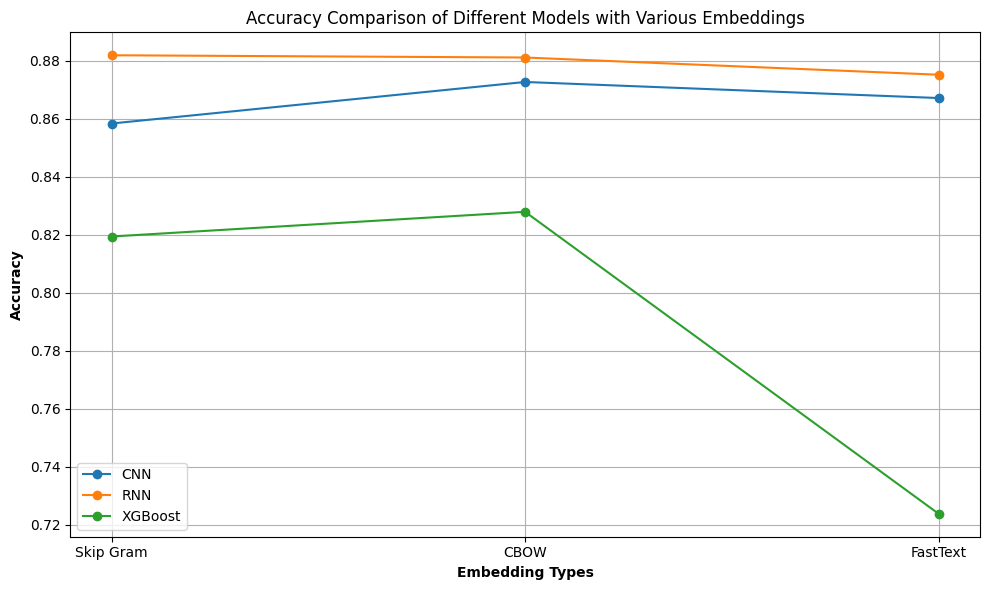

In [3]:
import matplotlib.pyplot as plt

# Accuracies obtained for CNN, RNN, and XGBoost with skip gram, CBOW, and fasttext embeddings
# Replace these values with your actual accuracies
xgboost_accuracies = [ 0.8194340470130259, 0.827943304885961, 0.72383590357838]  # Accuracy obtained from xgboost for skip gram, CBOW, and fasttext embeddings, respectively
cnn_accuracies = [0.8583869934082031, 0.8727104663848877, 0.8671707510948181]  # Accuracy obtained from CNN for skip gram, CBOW, and fasttext embeddings, respectively
rnn_accuracies = [0.8819184303283691, 0.8811448812484741, 0.8752058744430542] # Accuracy obtained from RNN for skip gram, CBOW, and fasttext embeddings, respectively

# Embedding types
embedding_types = ['Skip Gram', 'CBOW', 'FastText']

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracies for CNN
plt.plot(embedding_types, cnn_accuracies, marker='o', label='CNN')

# Plot accuracies for RNN
plt.plot(embedding_types, rnn_accuracies, marker='o', label='RNN')

# Plot accuracies for XGBoost
plt.plot(embedding_types, xgboost_accuracies, marker='o', label='XGBoost')

# Add labels and title
plt.xlabel('Embedding Types', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Different Models with Various Embeddings')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### From the above results accuracy graph we could see that RNN has the better accuracy with all the three embeddings, it(RNN) gives the best accuracy  for CBOW embeddings. **most optimal model is RNN with CBOW embeddings**. There are two reasons for it:

1. The training accuracy and validation accuracy graph for RNN, DO NOT SHOW OVER FIT or UNDER FIT significantly, indicating the model is performing very well. We have used only 5 epchs due to computational constraints and we see a consistent increase in the accuracy for every epoch. If we train the model for more epochs then the model might give even better results.

2. **Why are we NOT choosing XGBOOST?** with our computational resources, we needed almost 1.5 hours to generate the average vectors for each type of embedding, executing the XGBOOST with these averaged embeddings executed fairly quickly, so we can say that XGBOOST takes 1.5 hrs for its complete execution. But, RNN model executed in almost 30 minutes with the same amount of computational resources and has better accuracy, in 1/3rd of the time taken by XGBOOST. So we think that adding extra layers and running more epochs on RNN will definitely give better results with the time that XGBOOST needs.

3. **Why are we NOT choosing CNN?** the time taken by CNN and RNN is almost same. But the accuracy and loss graphs analysed for CNN show OVERFITTING and do not show a steady increase in accuracy for every epoch as in case of RNN. So we think RNN is more reliable than CNN.

Fasttext embeddings with RNN showed very slightly better accuracy comapared to other two embeddings, so we are choosing **RNN with CBOW**


### RESULTS and PERFORMANCE analysis


#### **The below graphs for CNN show overfitting with all the 3 embeddings. But, the overall accuracy of CNN is better with skipgram.**





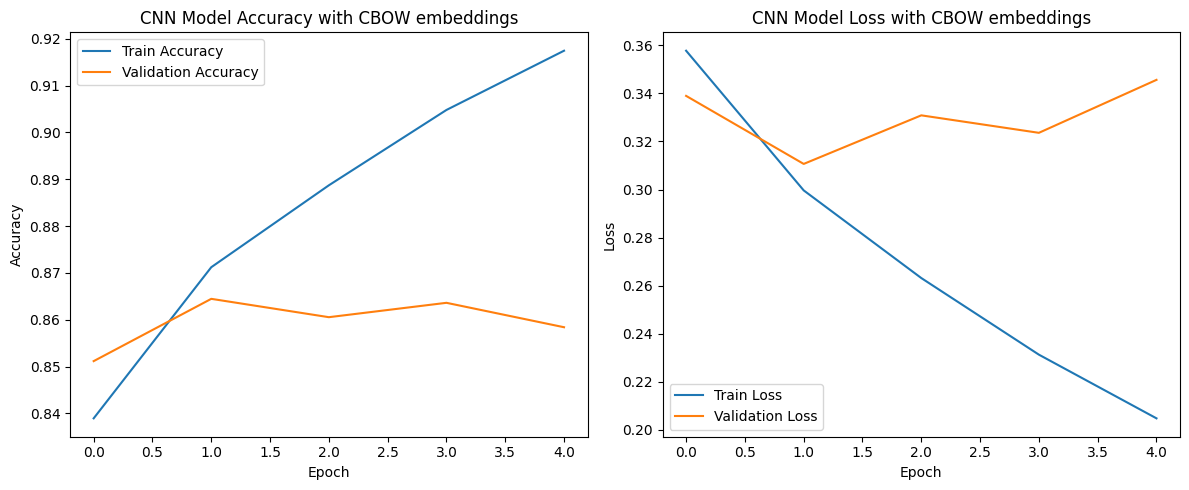

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_cb.history['acc'], label='Train Accuracy')
plt.plot(history_cnn_cb.history['val_acc'], label='Validation Accuracy')
plt.title('CNN Model Accuracy with CBOW embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_cb.history['loss'], label='Train Loss')
plt.plot(history_cnn_cb.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss with CBOW embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

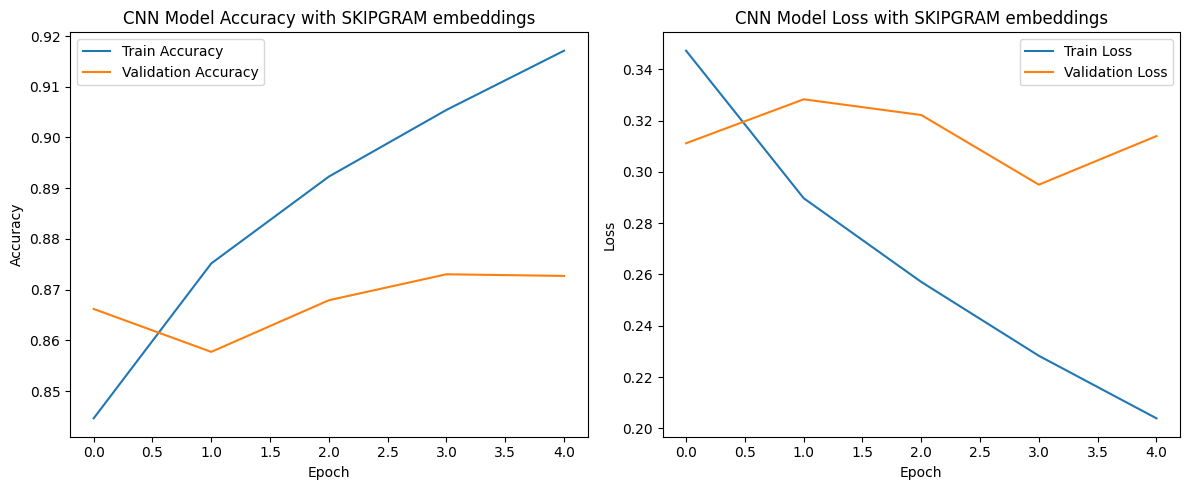

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_sg.history['acc'], label='Train Accuracy')
plt.plot(history_cnn_sg.history['val_acc'], label='Validation Accuracy')
plt.title('CNN Model Accuracy with SKIPGRAM embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_sg.history['loss'], label='Train Loss')
plt.plot(history_cnn_sg.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss with SKIPGRAM embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

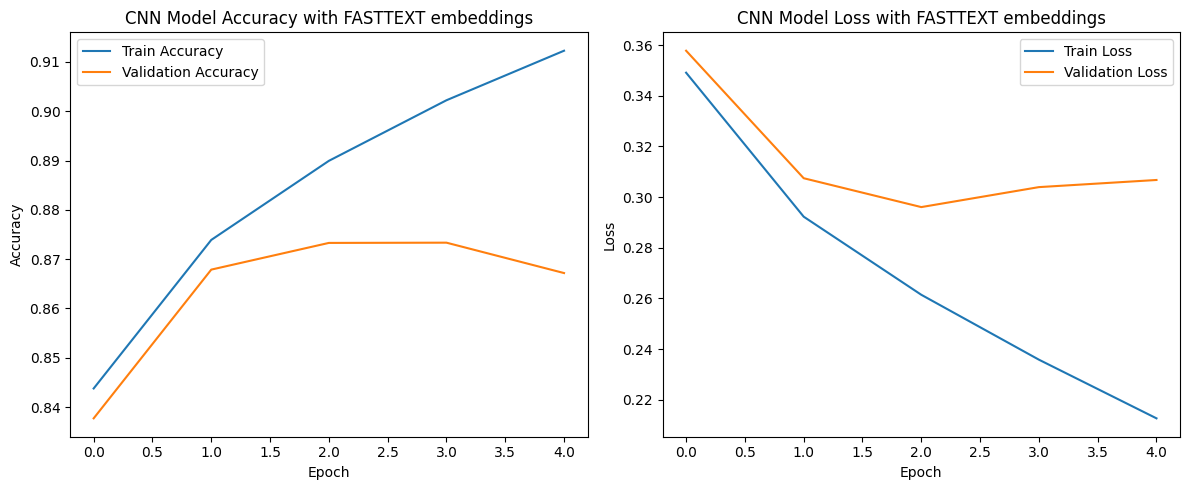

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_ft.history['acc'], label='Train Accuracy')
plt.plot(history_cnn_ft.history['val_acc'], label='Validation Accuracy')
plt.title('CNN Model Accuracy with FASTTEXT embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_ft.history['loss'], label='Train Loss')
plt.plot(history_cnn_ft.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss with FASTTEXT embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**The graphs below for RNN do not show OVERFITTING OR UNDERFITTING for all the three types of embeddings, suggesting that the model is adequately capturing the patterns in the data without either excessively memorizing the training data or failing to learn important patterns.**

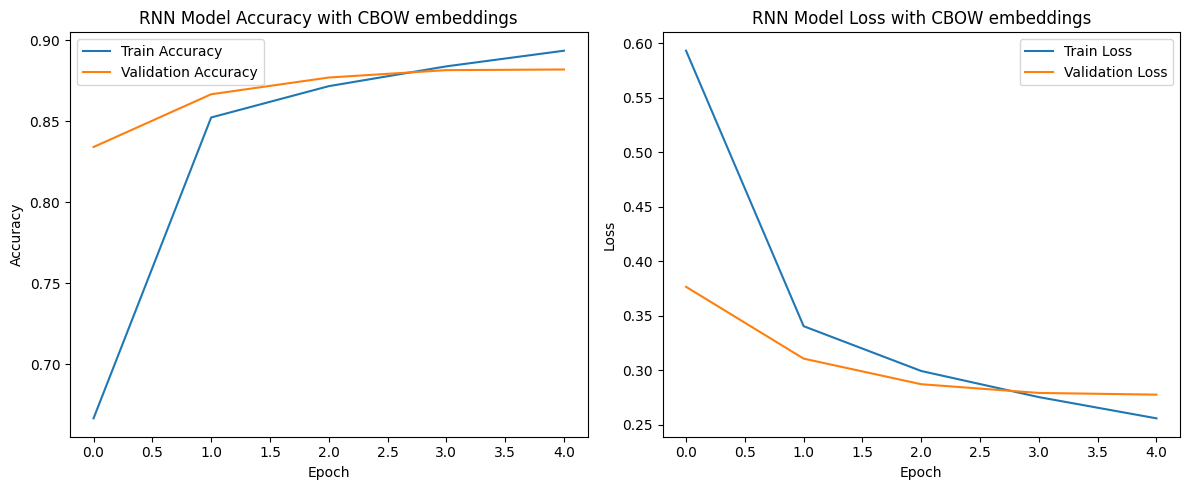

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn_cb.history['acc'], label='Train Accuracy')
plt.plot(history_rnn_cb.history['val_acc'], label='Validation Accuracy')
plt.title('RNN Model Accuracy with CBOW embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn_cb.history['loss'], label='Train Loss')
plt.plot(history_rnn_cb.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss with CBOW embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

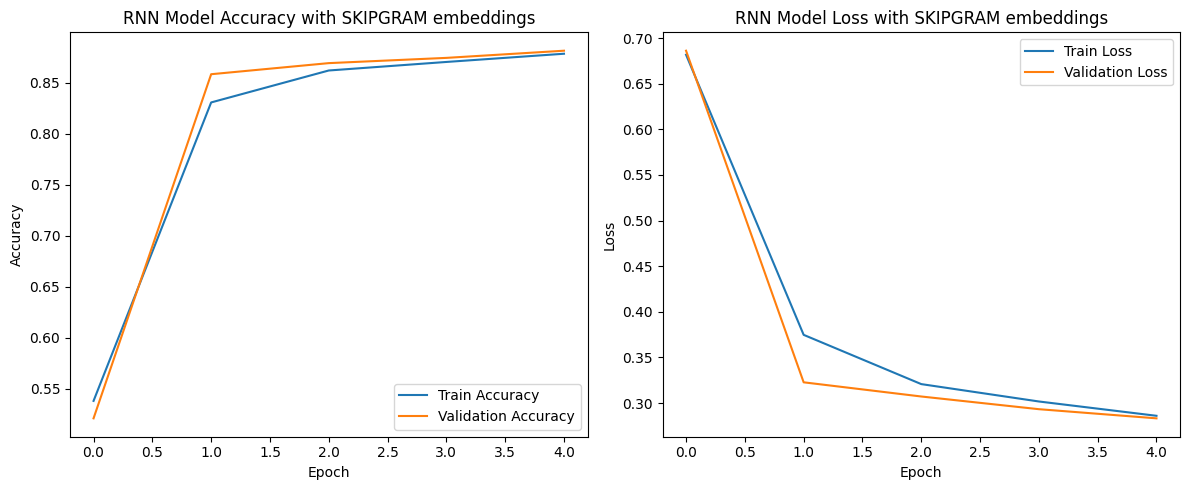

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn_sg.history['acc'], label='Train Accuracy')
plt.plot(history_rnn_sg.history['val_acc'], label='Validation Accuracy')
plt.title('RNN Model Accuracy with SKIPGRAM embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn_sg.history['loss'], label='Train Loss')
plt.plot(history_rnn_sg.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss with SKIPGRAM embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

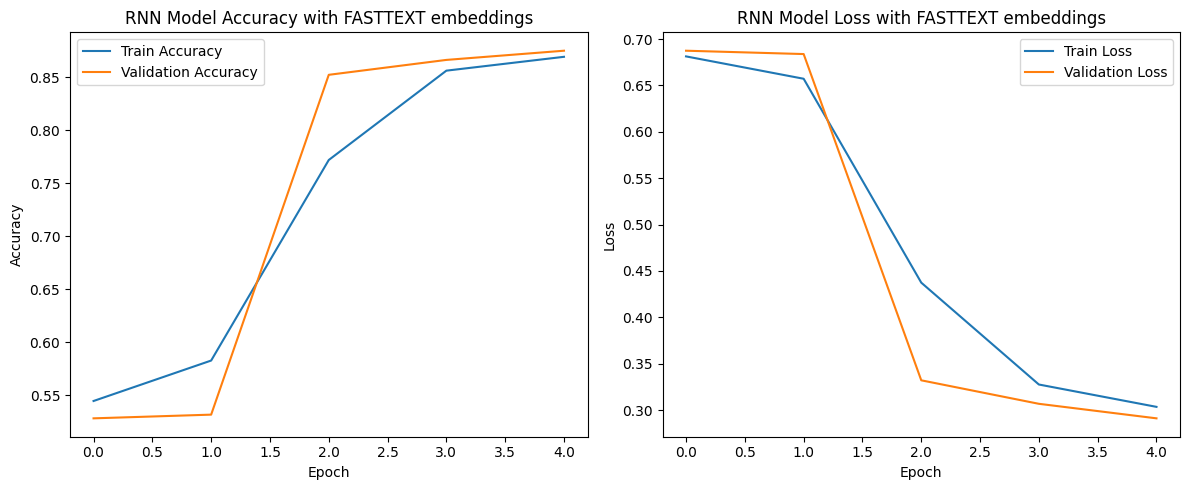

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn_ft.history['acc'], label='Train Accuracy')
plt.plot(history_rnn_ft.history['val_acc'], label='Validation Accuracy')
plt.title('RNN Model Accuracy with FASTTEXT embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn_ft.history['loss'], label='Train Loss')
plt.plot(history_rnn_ft.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss with FASTTEXT embeddings')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **CONFUSION MATRICES FOR ALL THE THREE MODELS WITH ALL THE THREE EMBEDDINGS**

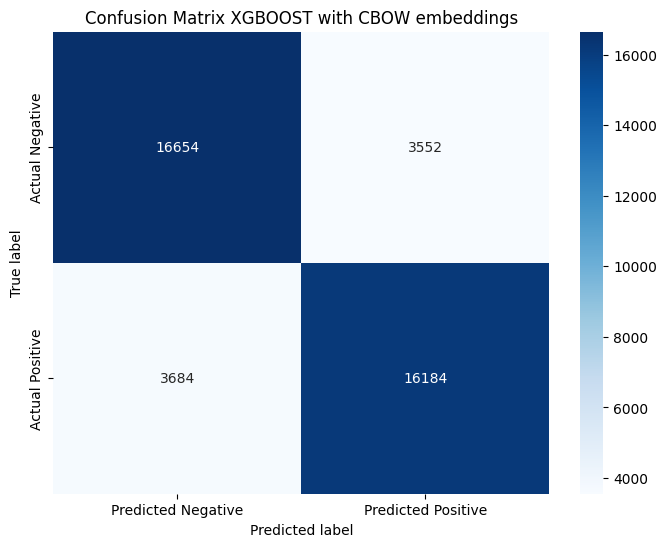

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Construct confusion matrix
conf_matrix_xgb_cb = confusion_matrix(y_test_cb, xgb_pred_cb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_cb, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix XGBOOST with CBOW embeddings')
plt.show()

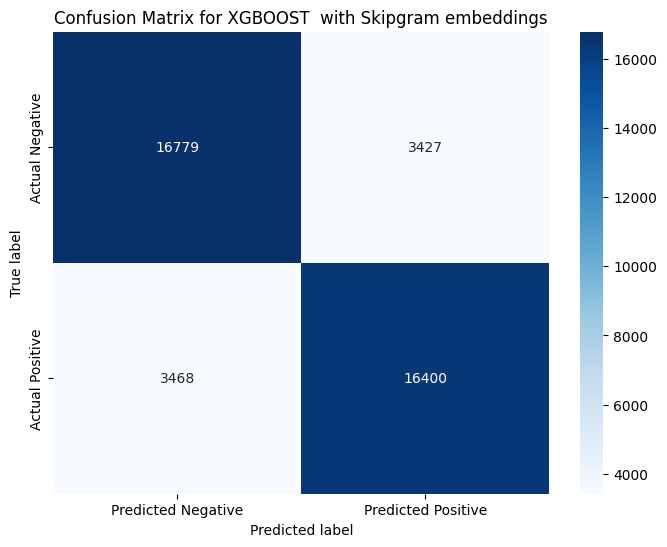

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Construct confusion matrix
conf_matrix_xgb_sg = confusion_matrix(y_test_sg, xgb_pred_sg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_sg, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBOOST  with Skipgram embeddings')
plt.show()

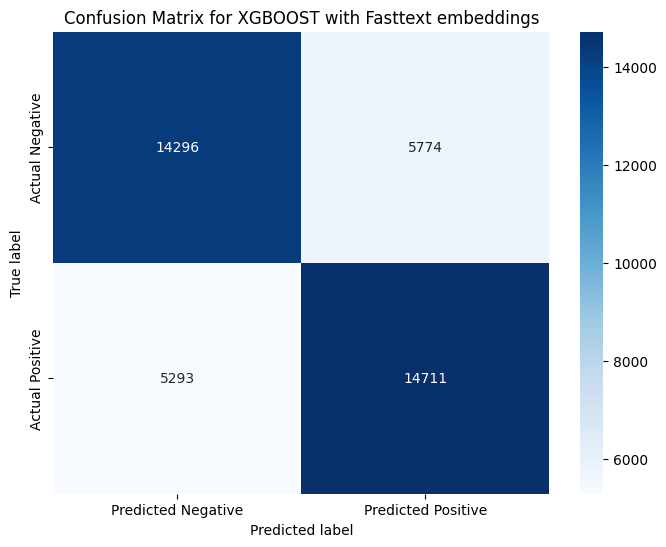

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Construct confusion matrix
conf_matrix_xgb_ft = confusion_matrix(y_test_ft, xgb_pred_ft)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_ft, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBOOST with Fasttext embeddings')
plt.show()

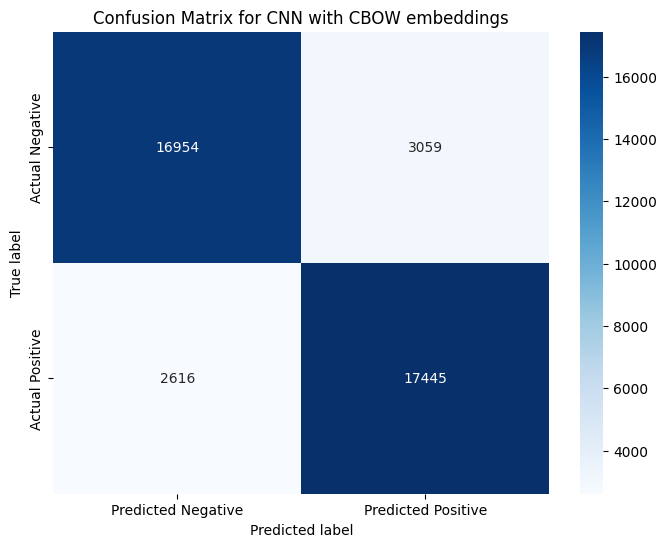

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_cnn_cb = confusion_matrix(y_test, df_test_cnn_cb['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_cb, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CNN with CBOW embeddings')
plt.show()

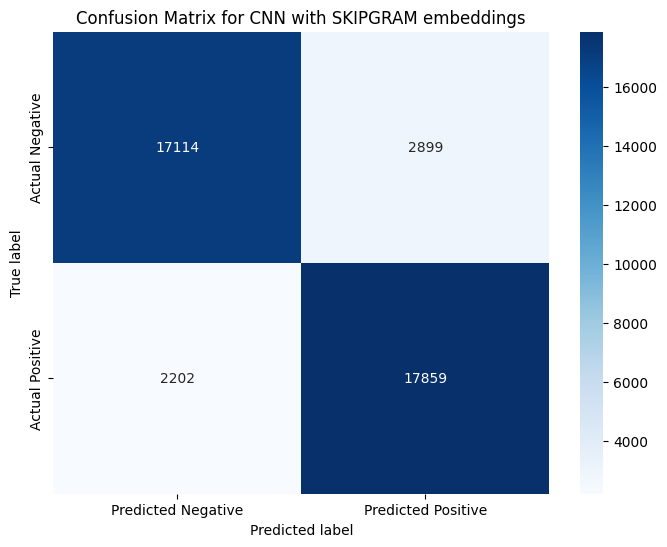

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_cnn_sg = confusion_matrix(y_test, df_test_cnn_sg['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_sg, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CNN with SKIPGRAM embeddings')
plt.show()

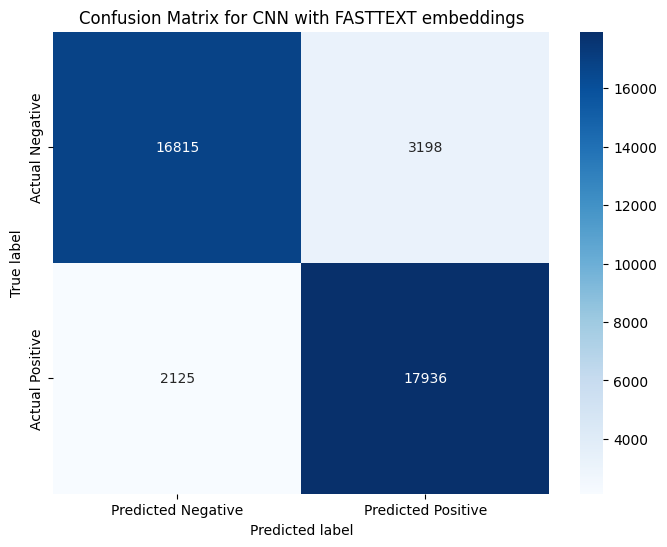

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_cnn_ft = confusion_matrix(y_test, df_test_cnn_ft['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_ft, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CNN with FASTTEXT embeddings')
plt.show()

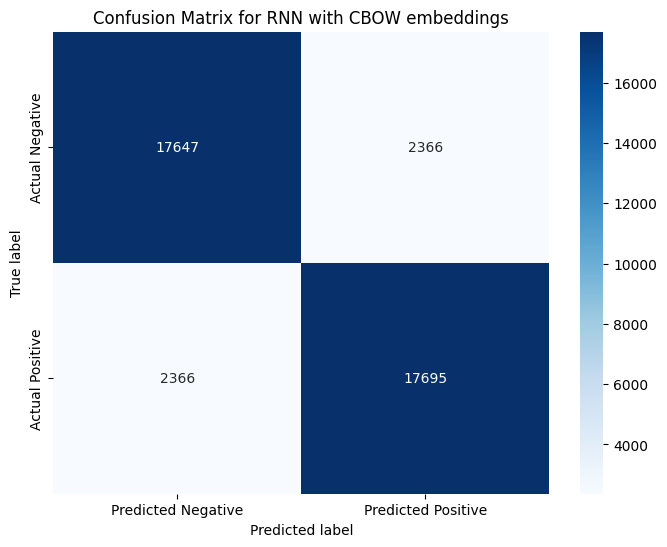

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_rnn_cb = confusion_matrix(y_test, df_test_rnn_cb['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn_cb, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RNN with CBOW embeddings')
plt.show()

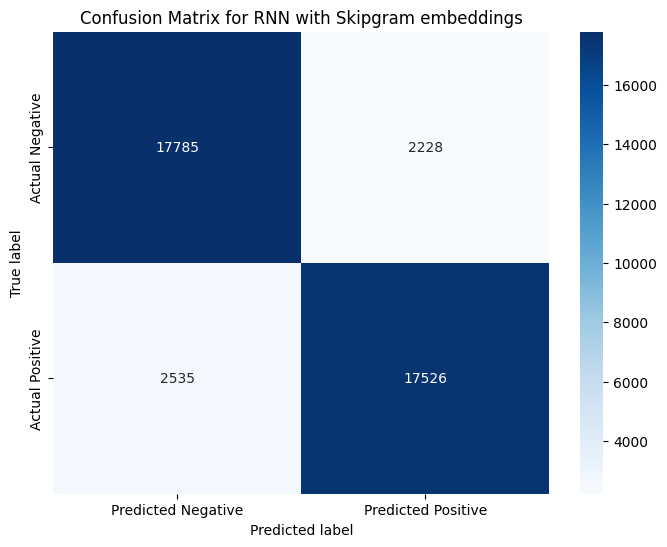

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_rnn_sg = confusion_matrix(y_test, df_test_rnn_sg['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn_sg, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RNN with Skipgram embeddings')
plt.show()

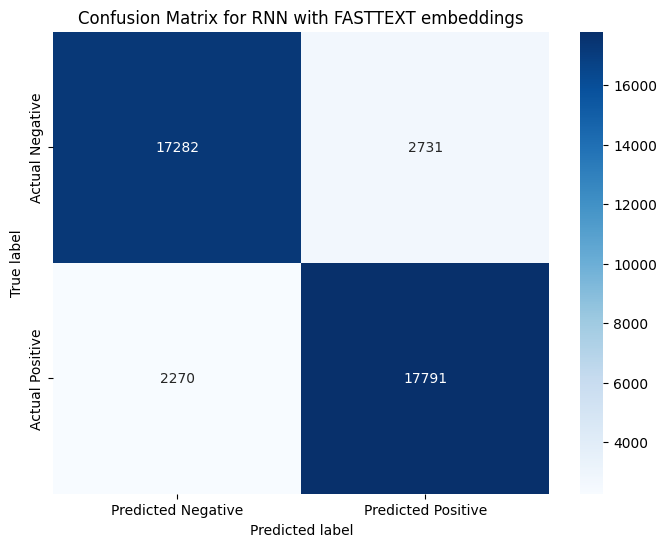

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Construct confusion matrix
conf_matrix_rnn_ft = confusion_matrix(y_test, df_test_rnn_ft['prediction'] )

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn_ft, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RNN with FASTTEXT embeddings')
plt.show()

### FALSE POSITIVES & FALSE NEGATIVES

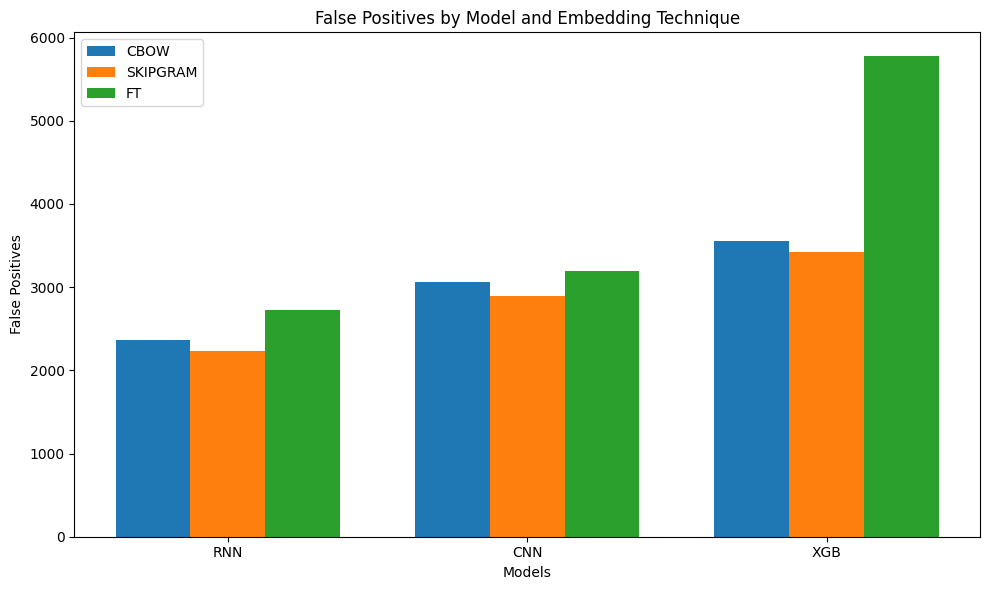

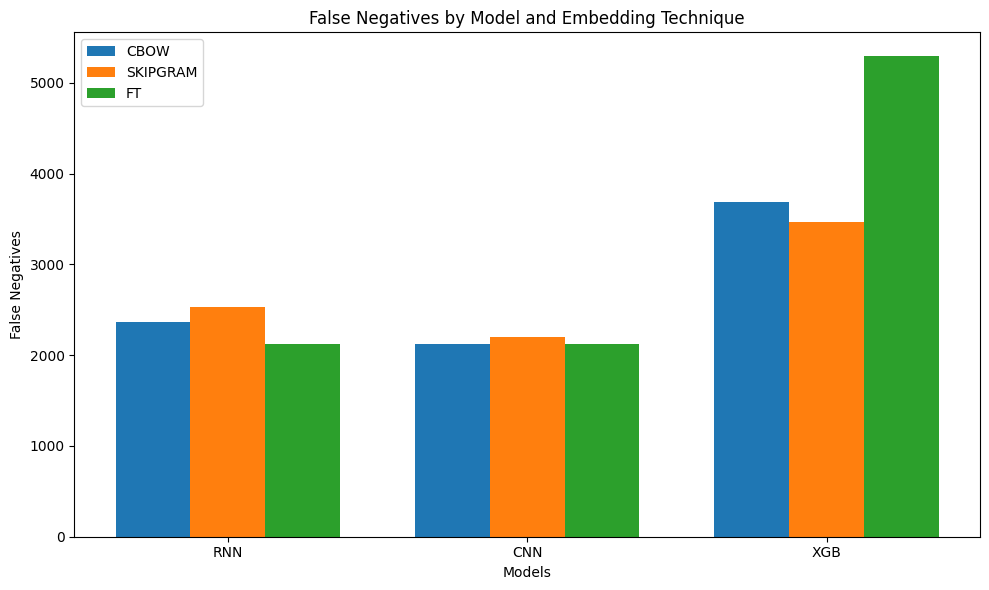

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['RNN', 'CNN', 'XGB']
embedding_techniques = ['CBOW', 'SKIPGRAM', 'FT']

false_positives = np.array([[2366, 2228, 2731],
                             [3059, 2899, 3198],
                             [3552, 3427, 5774]])

false_negatives = np.array([[2366, 2535, 2125],
                             [2126, 2202, 2125],
                             [3684, 3468, 5293]])

# Plotting false positives
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(models))

for i, technique in enumerate(embedding_techniques):
    plt.bar(index + i * bar_width, false_positives[:, i], bar_width, label=technique)

plt.xlabel('Models')
plt.ylabel('False Positives')
plt.title('False Positives by Model and Embedding Technique')
plt.xticks(index + bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting false negatives
plt.figure(figsize=(10, 6))

for i, technique in enumerate(embedding_techniques):
    plt.bar(index + i * bar_width, false_negatives[:, i], bar_width, label=technique)

plt.xlabel('Models')
plt.ylabel('False Negatives')
plt.title('False Negatives by Model and Embedding Technique')
plt.xticks(index + bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()


#### We can observe from the above graphs that the number of false positives and false negatives is almost same for every model and every embedding. To analyze further we have saved all such reviews in a csv file, our observations are as below:

1. In some reviews the reviewer has explained about how they had a negative experience before and how the current experience was better, which is actually a positive review, but due to the words used to describe the negative experience the context is not being captured accurately and they are being classified as negative reviews.

2. In some reviews there are no words at all with positive or negative sentiment. So the models are not able to identify them correctly and are being misclassified.

3. In some categories such as tools and home improvement, terms like break up voltage, sagging lines are used which are just terms of electrical context. But such reviews are being misclassified as negative.

4. Some reviews may contain ambiguous language or mixed sentiments that make it difficult for the classifier to accurately determine the sentiment. For example, phrases like "barely latches" and "offers little protection" could be interpreted as negative, even though the overall review might be neutral or positive.

5. misinterpretation of certain phrases or statements. For instance, phrases like "effective also discolor red wine" might be misinterpreted as a positive attribute (i.e., effectiveness) rather than a negative one (i.e., discoloration).

6. positive or negative sentiment words are preceeded by negatory word, but that may not be captured.

#### **XGB CB**

In [ ]:
df4 = pd.DataFrame(data=fp_reviews_xgb_cb)
df5 = pd.DataFrame(data=fn_reviews_xgb_cb)
df4.to_csv('false_positives_XGB_CBOW.csv', index=True)
df5.to_csv('false_negatives_XGB_CBOW.csv', index=True)
print("False positive reviews (XGB - CBOW):")
print(df4.shape)
display(df4.head(3))
print("False negative reviews (XGB - CBOW):")
display(df5.shape)
display(df5.head(3))

False positive reviews (XGB - CBOW):
(3552, 1)


,reviewText2
13668,wallet made nice cute anyone really couponing ...
112778,stuff easy wife said thinks trouble hand bough...
199407,convenient brewing steep fully infuse teaease ...


False negative reviews (XGB - CBOW):


(3684, 1)

,reviewText2
28340,like cook crockpot know going picked lid plast...
119604,tough time getting big buddy work hose new lb ...
195504,bought replacement one bought yrs ago took bea...


##### **XGB SG**

In [ ]:
df_sg_fp = pd.DataFrame(data=fp_reviews_xgb_sg)
df_sg_fn = pd.DataFrame(data=fn_reviews_xgb_sg)
df_sg_fp.to_csv('false_positives_XGB_SG.csv', index=True)
df_sg_fn.to_csv('false_negatives_XGB_SG.csv', index=True)
print("False positive reviews (XGB - SG):")
print(df_sg_fp.shape)
display(df_sg_fp.head(3))
print("False negative reviews (XGB - SG):")
print(df_sg_fn.shape)
display(df_sg_fn.head(3))

False positive reviews (XGB - SG):
(3427, 1)


,reviewText2
13668,wallet made nice cute anyone really couponing ...
112778,stuff easy wife said thinks trouble hand bough...
197944,many reviewers comment pan ability roast turke...


False negative reviews (XGB - SG):
(3468, 1)


,reviewText2
157173,looks like reviewed fair nice bipod price expe...
119604,tough time getting big buddy work hose new lb ...
46768,reading reviews confused exactly noisy fan wou...


#### **XGB FT**

In [ ]:
df_ft_fp = pd.DataFrame(data=fp_reviews_xgb_ft)
df_ft_fn = pd.DataFrame(data=fn_reviews_xgb_ft)
df_ft_fp.to_csv('false_positives_XGB_FT.csv', index=True)
df_ft_fn.to_csv('false_negatives_XGB_FT.csv', index=True)
print("False positive reviews (XGB - FT):")
print(df_ft_fp.shape)
display(df_ft_fp.head(3))
print("False negative reviews (XGB - FT):")
print(df_ft_fn.shape)
display(df_ft_fn.head(3))

False positive reviews (XGB - FT):
(3359, 1)


,reviewText2
59599,cat good cat kids came along hated kids everyw...
43602,computer works fine cost extra trip walmart ge...
21397,purchased xdm get wrong fits fine around thigh...


False negative reviews (XGB - FT):
(3397, 1)


,reviewText2
179031,well put together sure makes loud sound set sc...
112778,mine years put ebay bought new ryobi v lithium...
157173,ordered item monday around noon received next ...


##### **CNN CB**

In [ ]:
df_cnn_cb_fp = pd.DataFrame(data=fp_reviews_cnn_cb)
df_cnn_cb_fn = pd.DataFrame(data=fn_reviews_cnn_cb)
df_cnn_cb_fp.to_csv('false_positives_CNN_cb.csv', index=True)
df_cnn_cb_fn.to_csv('false_negatives_CNN_cb.csv', index=True)
print("False positive reviews (CNN - CB):")
print(df_cnn_cb_fp.shape)
display(df_cnn_cb_fp.head(3))
print("False negative reviews (CNN - CB):")
print(df_cnn_cb_fn.shape)
display(df_cnn_cb_fn.head(3))

False positive reviews (CNN - CB):
(3059, 1)


,reviewText2
169464,thought would keep wine beer etc cold cold com...
70252,barely latches offers little protection anythi...
79550,update update month short year ownership time ...


False negative reviews (CNN - CB):
(3059, 1)


,reviewText2
62810,seem like hold anything used fix purse got chr...
157173,anyone looking set sure want pull trigger matr...
99848,easy kindergartner get open closed lasted pre ...


##### **CNN SG**

In [ ]:
df_cnn_sg_fp = pd.DataFrame(data=fp_reviews_cnn_sg)
df_cnn_sg_fn = pd.DataFrame(data=fn_reviews_cnn_sg)
df_cnn_sg_fp.to_csv('false_positives_CNN_sg.csv', index=True)
df_cnn_sg_fn.to_csv('false_negatives_CNN_sg.csv', index=True)
print("False positive reviews (CNN - SG):")
print(df_cnn_sg_fp.shape)
display(df_cnn_sg_fp.head(3))
print("False negative reviews (CNN - SG):")
print(df_cnn_sg_fn.shape)
display(df_cnn_sg_fn.head(3))

False positive reviews (CNN - SG):
(2899, 1)


,reviewText2
79910,pasta making nothing new whole family years ma...
169464,thought would keep wine beer etc cold cold com...
70252,barely latches offers little protection anythi...


False negative reviews (CNN - SG):
(2899, 1)


,reviewText2
62810,seem like hold anything used fix purse got chr...
157173,anyone looking set sure want pull trigger matr...
168569,thermometer casing impervious heat cannot left...


#### **CNN FT**

In [ ]:
df_cnn_ft_fp = pd.DataFrame(data=fp_reviews_cnn_ft)
df_cnn_ft_fn = pd.DataFrame(data=fn_reviews_cnn_ft)
df_cnn_ft_fp.to_csv('false_positives_CNN_ft.csv', index=True)
df_cnn_ft_fn.to_csv('false_negatives_CNN_ft.csv', index=True)
print("False positive reviews (CNN - FT):")
print(df_cnn_ft_fp.shape)
display(df_cnn_ft_fp.head(3))
print("False negative reviews (CNN - FT):")
print(df_cnn_ft_fn.shape)
display(df_cnn_ft_fn.head(3))

False positive reviews (CNN - FT):
(3198, 1)


,reviewText2
79910,pasta making nothing new whole family years ma...
169464,thought would keep wine beer etc cold cold com...
70252,barely latches offers little protection anythi...


False negative reviews (CNN - FT):
(3198, 1)


,reviewText2
157173,anyone looking set sure want pull trigger matr...
77651,large pit extremely strong jaws none indestruc...
168569,thermometer casing impervious heat cannot left...


##### **RNN CB**

In [ ]:
df_rnn_cb_fp = pd.DataFrame(data=fp_reviews_rnn_cb)
df_rnn_cb_fn = pd.DataFrame(data=fn_reviews_rnn_cb)
df_cnn_cb_fp.to_csv('false_positives_RNN_cb.csv', index=True)
df_cnn_cb_fn.to_csv('false_negatives_RNN_cb.csv', index=True)
print("False positive reviews (RNN - CB):")
print(df_rnn_cb_fp.shape)
display(df_rnn_cb_fp.head(3))
print("False negative reviews (RNN - CB):")
print(df_rnn_cb_fn.shape)
display(df_rnn_cb_fn.head(3))

False positive reviews (RNN - CB):
(2366, 1)


,reviewText2
70252,barely latches offers little protection anythi...
79550,update update month short year ownership time ...
6700,old sentimental favourite flash light yes job ...


False negative reviews (RNN - CB):
(2366, 1)


,reviewText2
62810,seem like hold anything used fix purse got chr...
157173,anyone looking set sure want pull trigger matr...
26869,seam sealing testing yard lawn sprinklers thin...


##### **RNN SG**

In [ ]:
df_cnn_ft_fp = pd.DataFrame(data=fp_reviews_cnn_ft)
df_cnn_ft_fn = pd.DataFrame(data=fn_reviews_cnn_ft)
df_cnn_ft_fp.to_csv('false_positives_CNN_ft.csv', index=True)
df_cnn_ft_fn.to_csv('false_negatives_CNN_ft.csv', index=True)
print("False positive reviews (CNN - FT):")
print(df_cnn_ft_fp.shape)
display(df_cnn_ft_fp.head(3))
print("False negative reviews (CNN - FT):")
print(df_cnn_ft_fn.shape)
display(df_cnn_ft_fn.head(3))

False positive reviews (CNN - FT):
(3198, 1)


,reviewText2
79910,pasta making nothing new whole family years ma...
169464,thought would keep wine beer etc cold cold com...
70252,barely latches offers little protection anythi...


False negative reviews (CNN - FT):
(3198, 1)


,reviewText2
157173,anyone looking set sure want pull trigger matr...
77651,large pit extremely strong jaws none indestruc...
168569,thermometer casing impervious heat cannot left...


In [ ]:
df_rnn_sg_fp = pd.DataFrame(data=fp_reviews_rnn_sg)
df_rnn_sg_fn = pd.DataFrame(data=fn_reviews_rnn_sg)
df_cnn_sg_fp.to_csv('false_positives_RNN_sg.csv', index=True)
df_cnn_sg_fn.to_csv('false_negatives_RNN_sg.csv', index=True)
print("False positive reviews (RNN - SG):")
print(df_rnn_sg_fp.shape)
display(df_rnn_sg_fp.head(3))
print("False negative reviews (RNN - SG):")
print(df_rnn_sg_fn.shape)
display(df_rnn_sg_fn.head(3))

False positive reviews (RNN - SG):
(2228, 1)


,reviewText2
79550,update update month short year ownership time ...
193039,ordered daughter turning soon since ice cream ...
6700,old sentimental favourite flash light yes job ...


False negative reviews (RNN - SG):
(2535, 1)


,reviewText2
62810,seem like hold anything used fix purse got chr...
157173,anyone looking set sure want pull trigger matr...
168569,thermometer casing impervious heat cannot left...


##### **RNN FT**

In [ ]:
df_rnn_ft_fp = pd.DataFrame(data=fp_reviews_rnn_ft)
df_rnn_ft_fn = pd.DataFrame(data=fn_reviews_rnn_ft)
df_rnn_ft_fp.to_csv('false_positives_RNN_FT.csv', index=True)
df_cnn_ft_fn.to_csv('false_negatives_RNN_FT.csv', index=True)
print("False positive reviews (RNN - FT):")
print(df_rnn_ft_fp.shape)
display(df_rnn_ft_fp.head(3))
print("False negative reviews (RNN - FT):")
print(df_cnn_ft_fn.shape)
display(df_cnn_ft_fn.head(3))

False positive reviews (RNN - FT):
(2731, 1)


,reviewText2
195504,head swap looks feels like fall even put ringe...
70252,barely latches offers little protection anythi...
79550,update update month short year ownership time ...


False negative reviews (RNN - FT):
(2125, 1)


,reviewText2
157173,anyone looking set sure want pull trigger matr...
77651,large pit extremely strong jaws none indestruc...
168569,thermometer casing impervious heat cannot left...
